In [1]:
library(tidyverse)
library(gridExtra)
library(car)

options(repr.plot.width = 15, repr.plot.height = 8, repr.plot.res = 300)


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr

# Spotify data

Almost 30,000 Songs from the Spotify API with black-box machine learning quantifications of musical features.

https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs

In [2]:
setwd("/home/rgiordan/Documents/git_repos/stat151a-spring-2024")
spotify_df <- read.csv("datasets/spotify_songs.csv")
head(spotify_df)
nrow(spotify_df)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,⋯,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxury Remix,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury Remix],2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,⋯,6,-2.634,1,0.0583,0.1020,0.00e+00,0.0653,0.518,122.036,194754
2,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,⋯,11,-4.969,1,0.0373,0.0724,4.21e-03,0.3570,0.693,99.972,162600
3,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,⋯,1,-3.432,0,0.0742,0.0794,2.33e-05,0.1100,0.613,124.008,176616
4,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,⋯,7,-3.778,1,0.1020,0.0287,9.43e-06,0.2040,0.277,121.956,169093
5,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,⋯,1,-4.672,1,0.0359,0.0803,0.00e+00,0.0833,0.725,123.976,189052
6,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,⋯,8,-5.385,1,0.1270,0.0799,0.00e+00,0.1430,0.585,124.982,163049


[1] 32833

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2703 rows containing non-finite values (`stat_bin()`).”


[1] "track_id"                 "track_name"              
 [3] "track_artist"             "track_popularity"        
 [5] "track_album_id"           "track_album_name"        
 [7] "track_album_release_date" "playlist_name"           
 [9] "playlist_id"              "playlist_genre"          
[11] "playlist_subgenre"        "danceability"            
[13] "energy"                   "key"                     
[15] "loudness"                 "mode"                    
[17] "speechiness"              "acousticness"            
[19] "instrumentalness"         "liveness"                
[21] "valence"                  "tempo"                   
[23] "duration_ms"

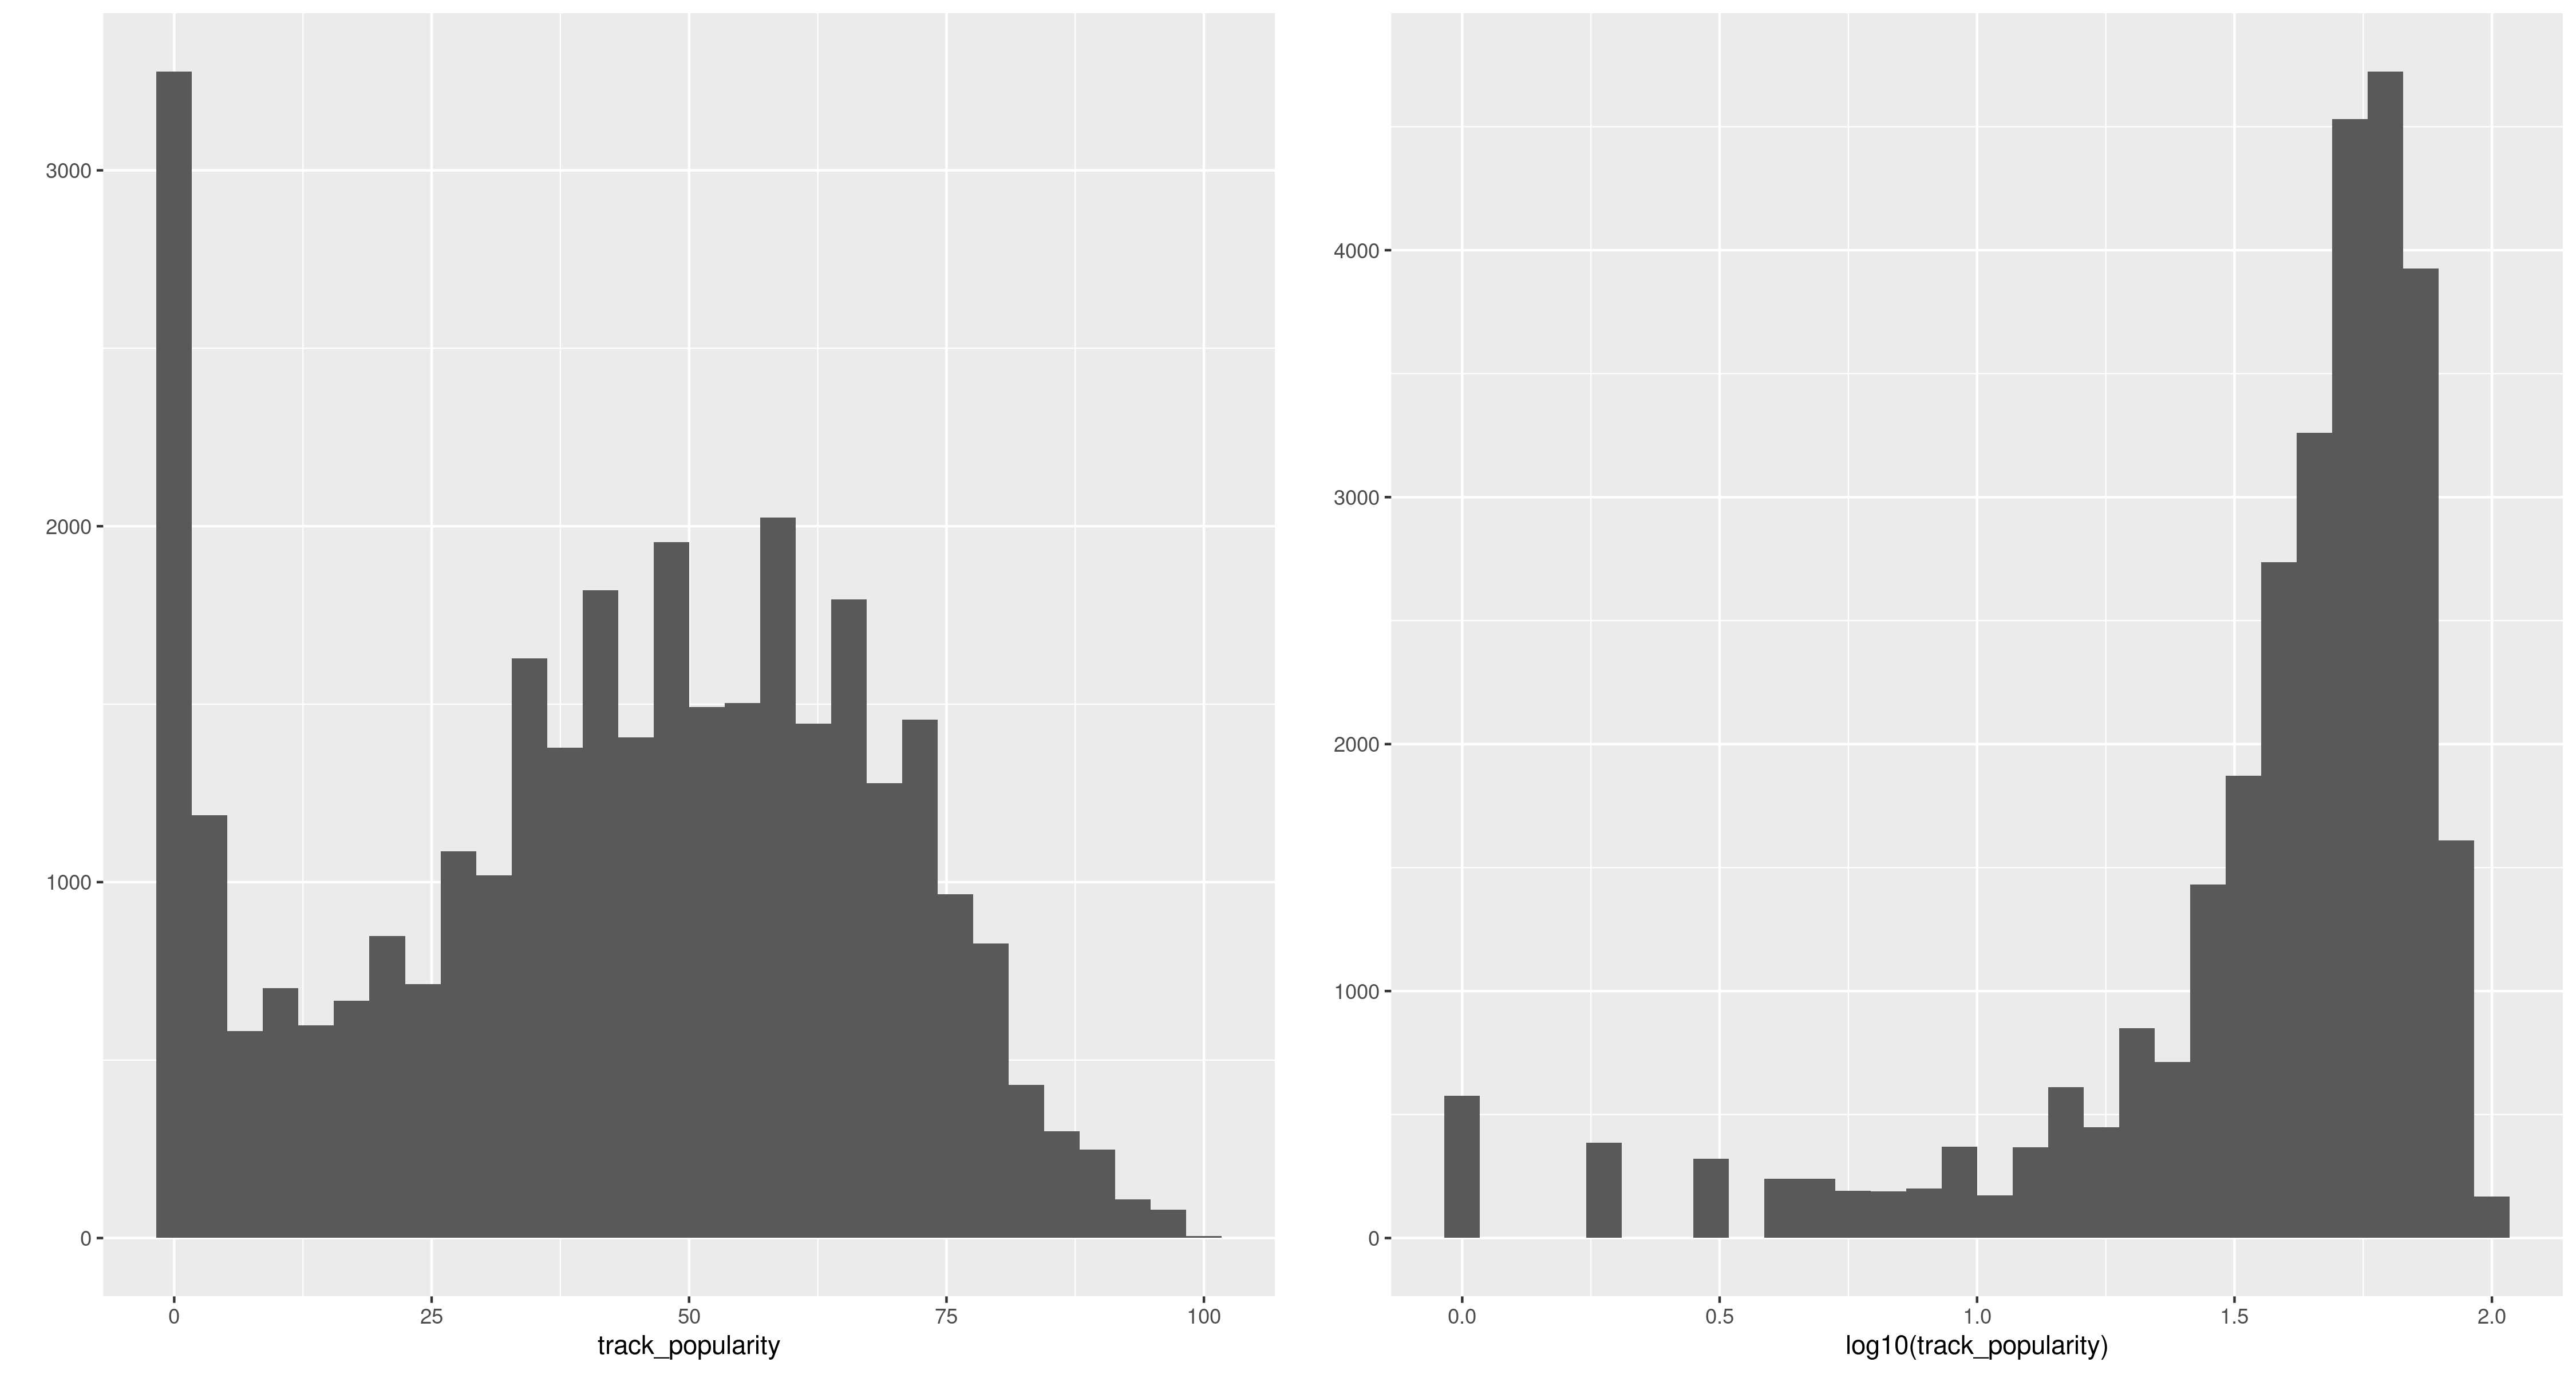

In [3]:
grid.arrange(
    qplot(x=track_popularity, geom="histogram", data=spotify_df),
    qplot(x=log10(track_popularity), geom="histogram", data=spotify_df), ncol=2)

names(spotify_df)
vars <- c("danceability", "energy", "key", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness")
stopifnot(all(vars %in% names(spotify_df)))

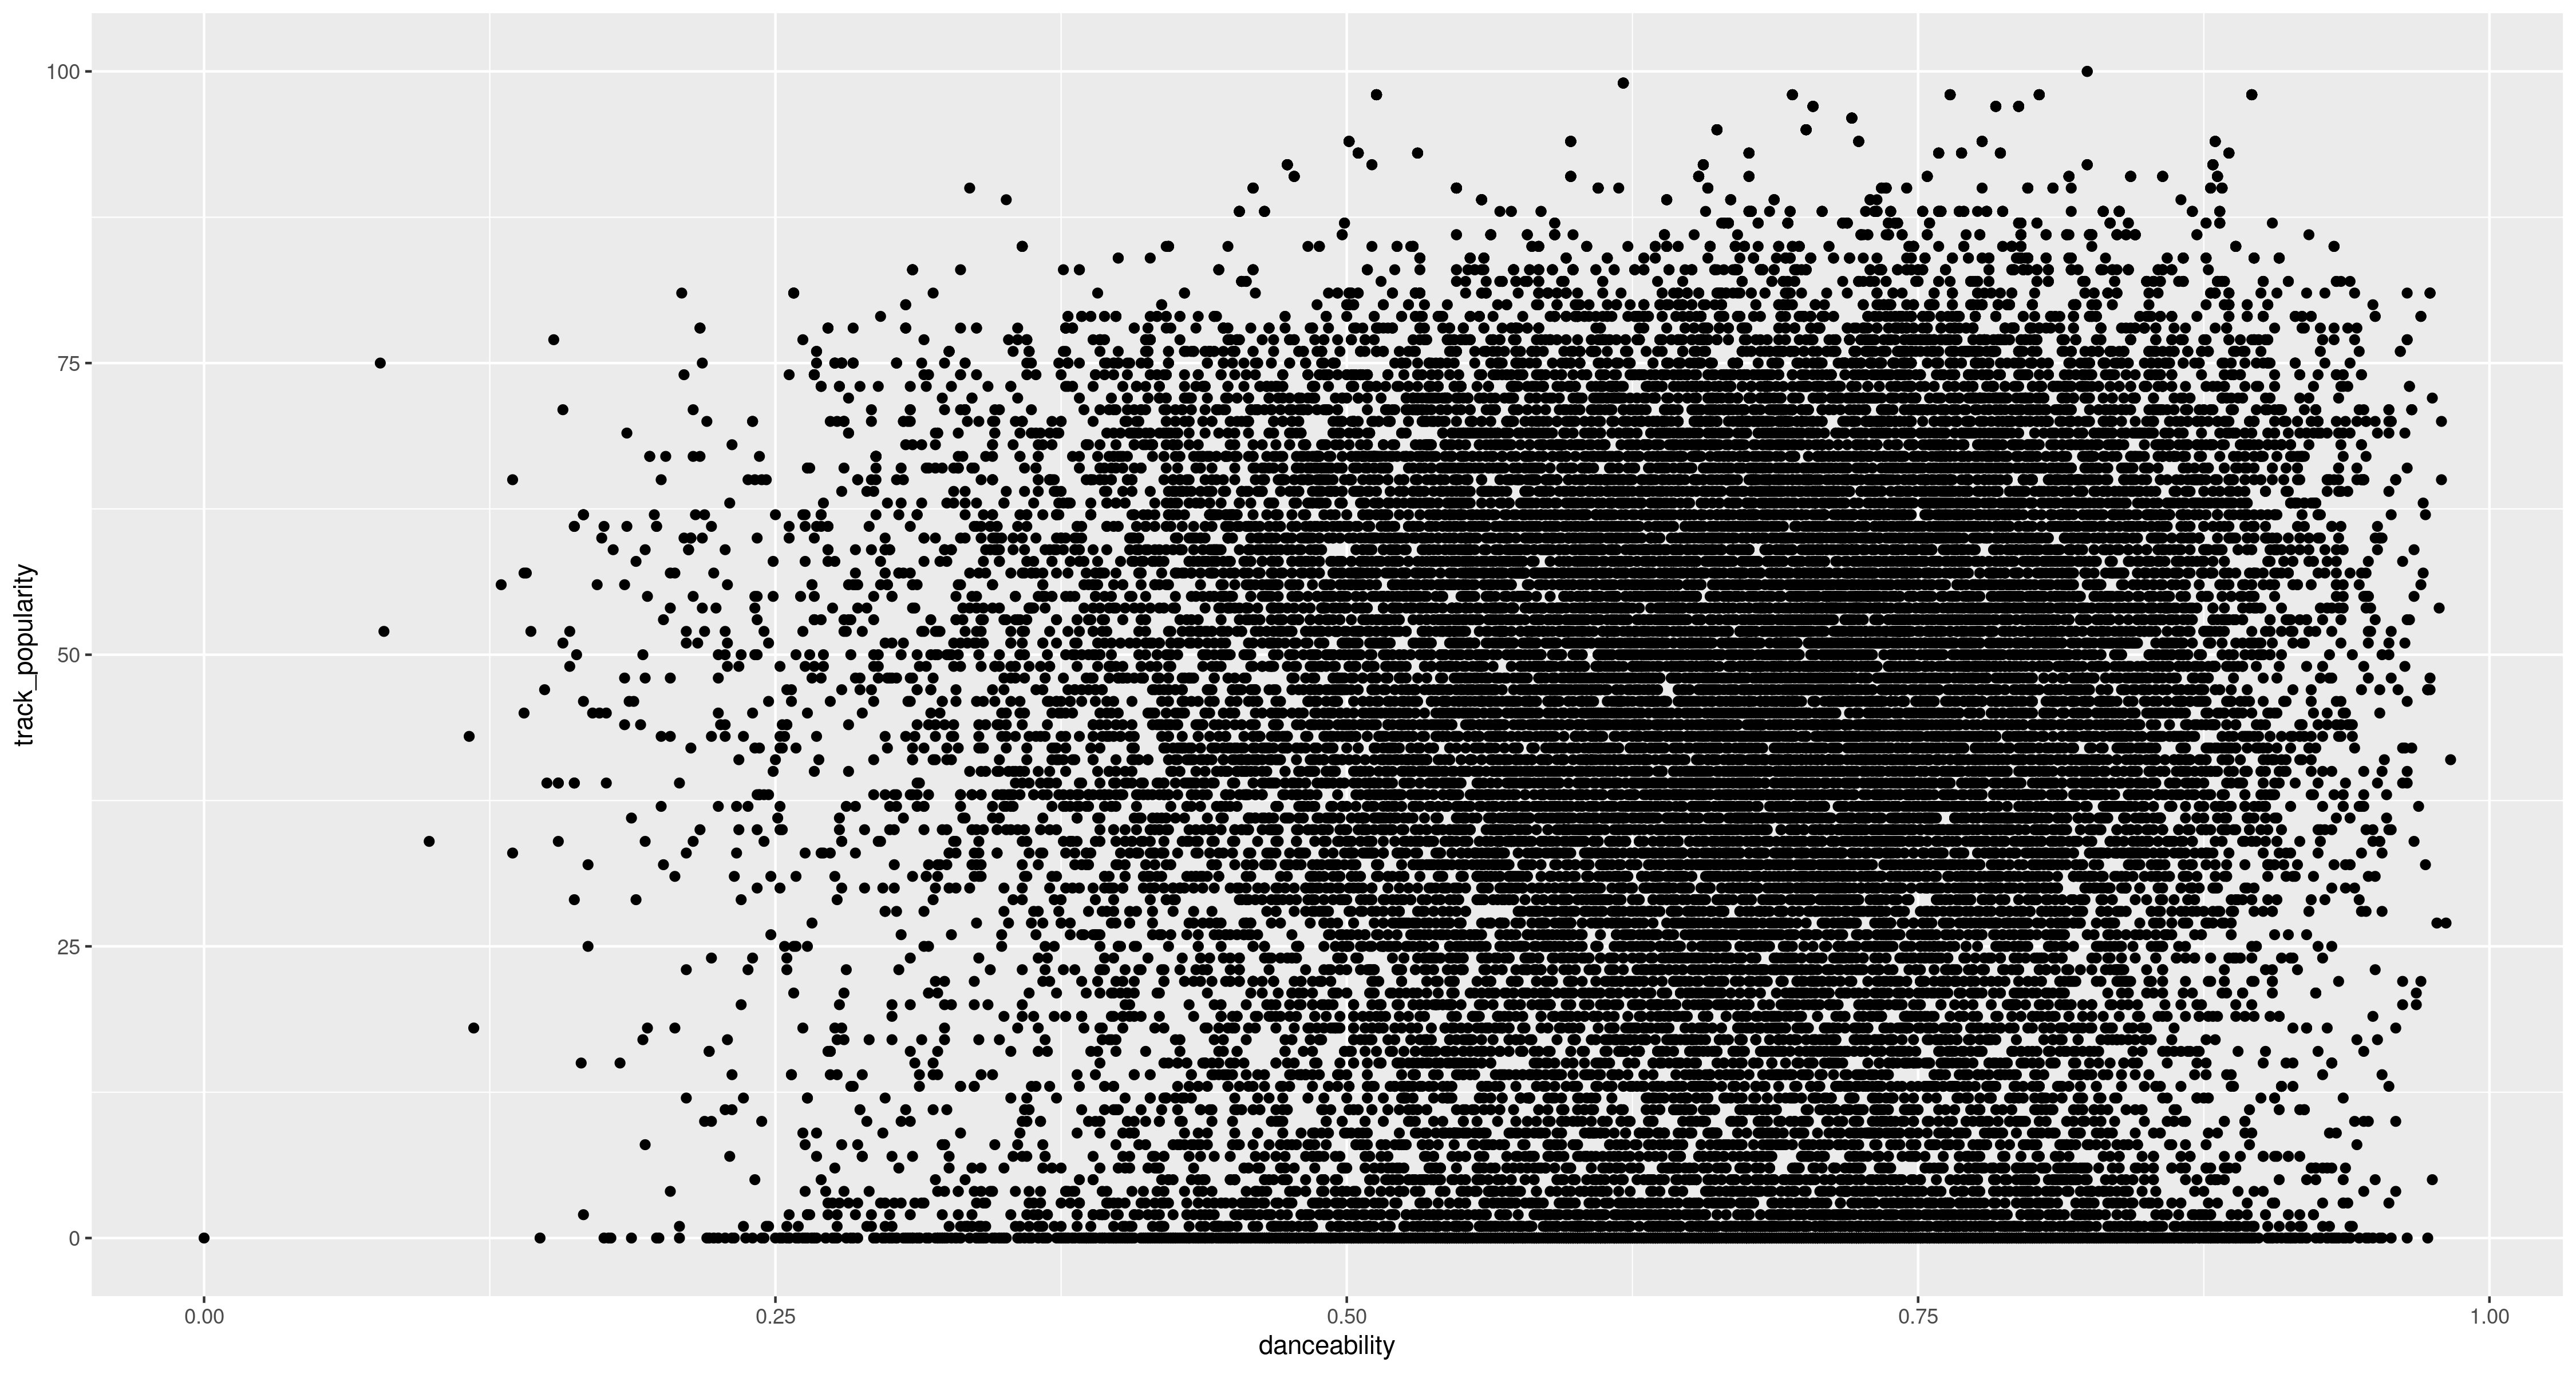

In [4]:
ggplot(spotify_df) + geom_point(aes(y=track_popularity, x=danceability))

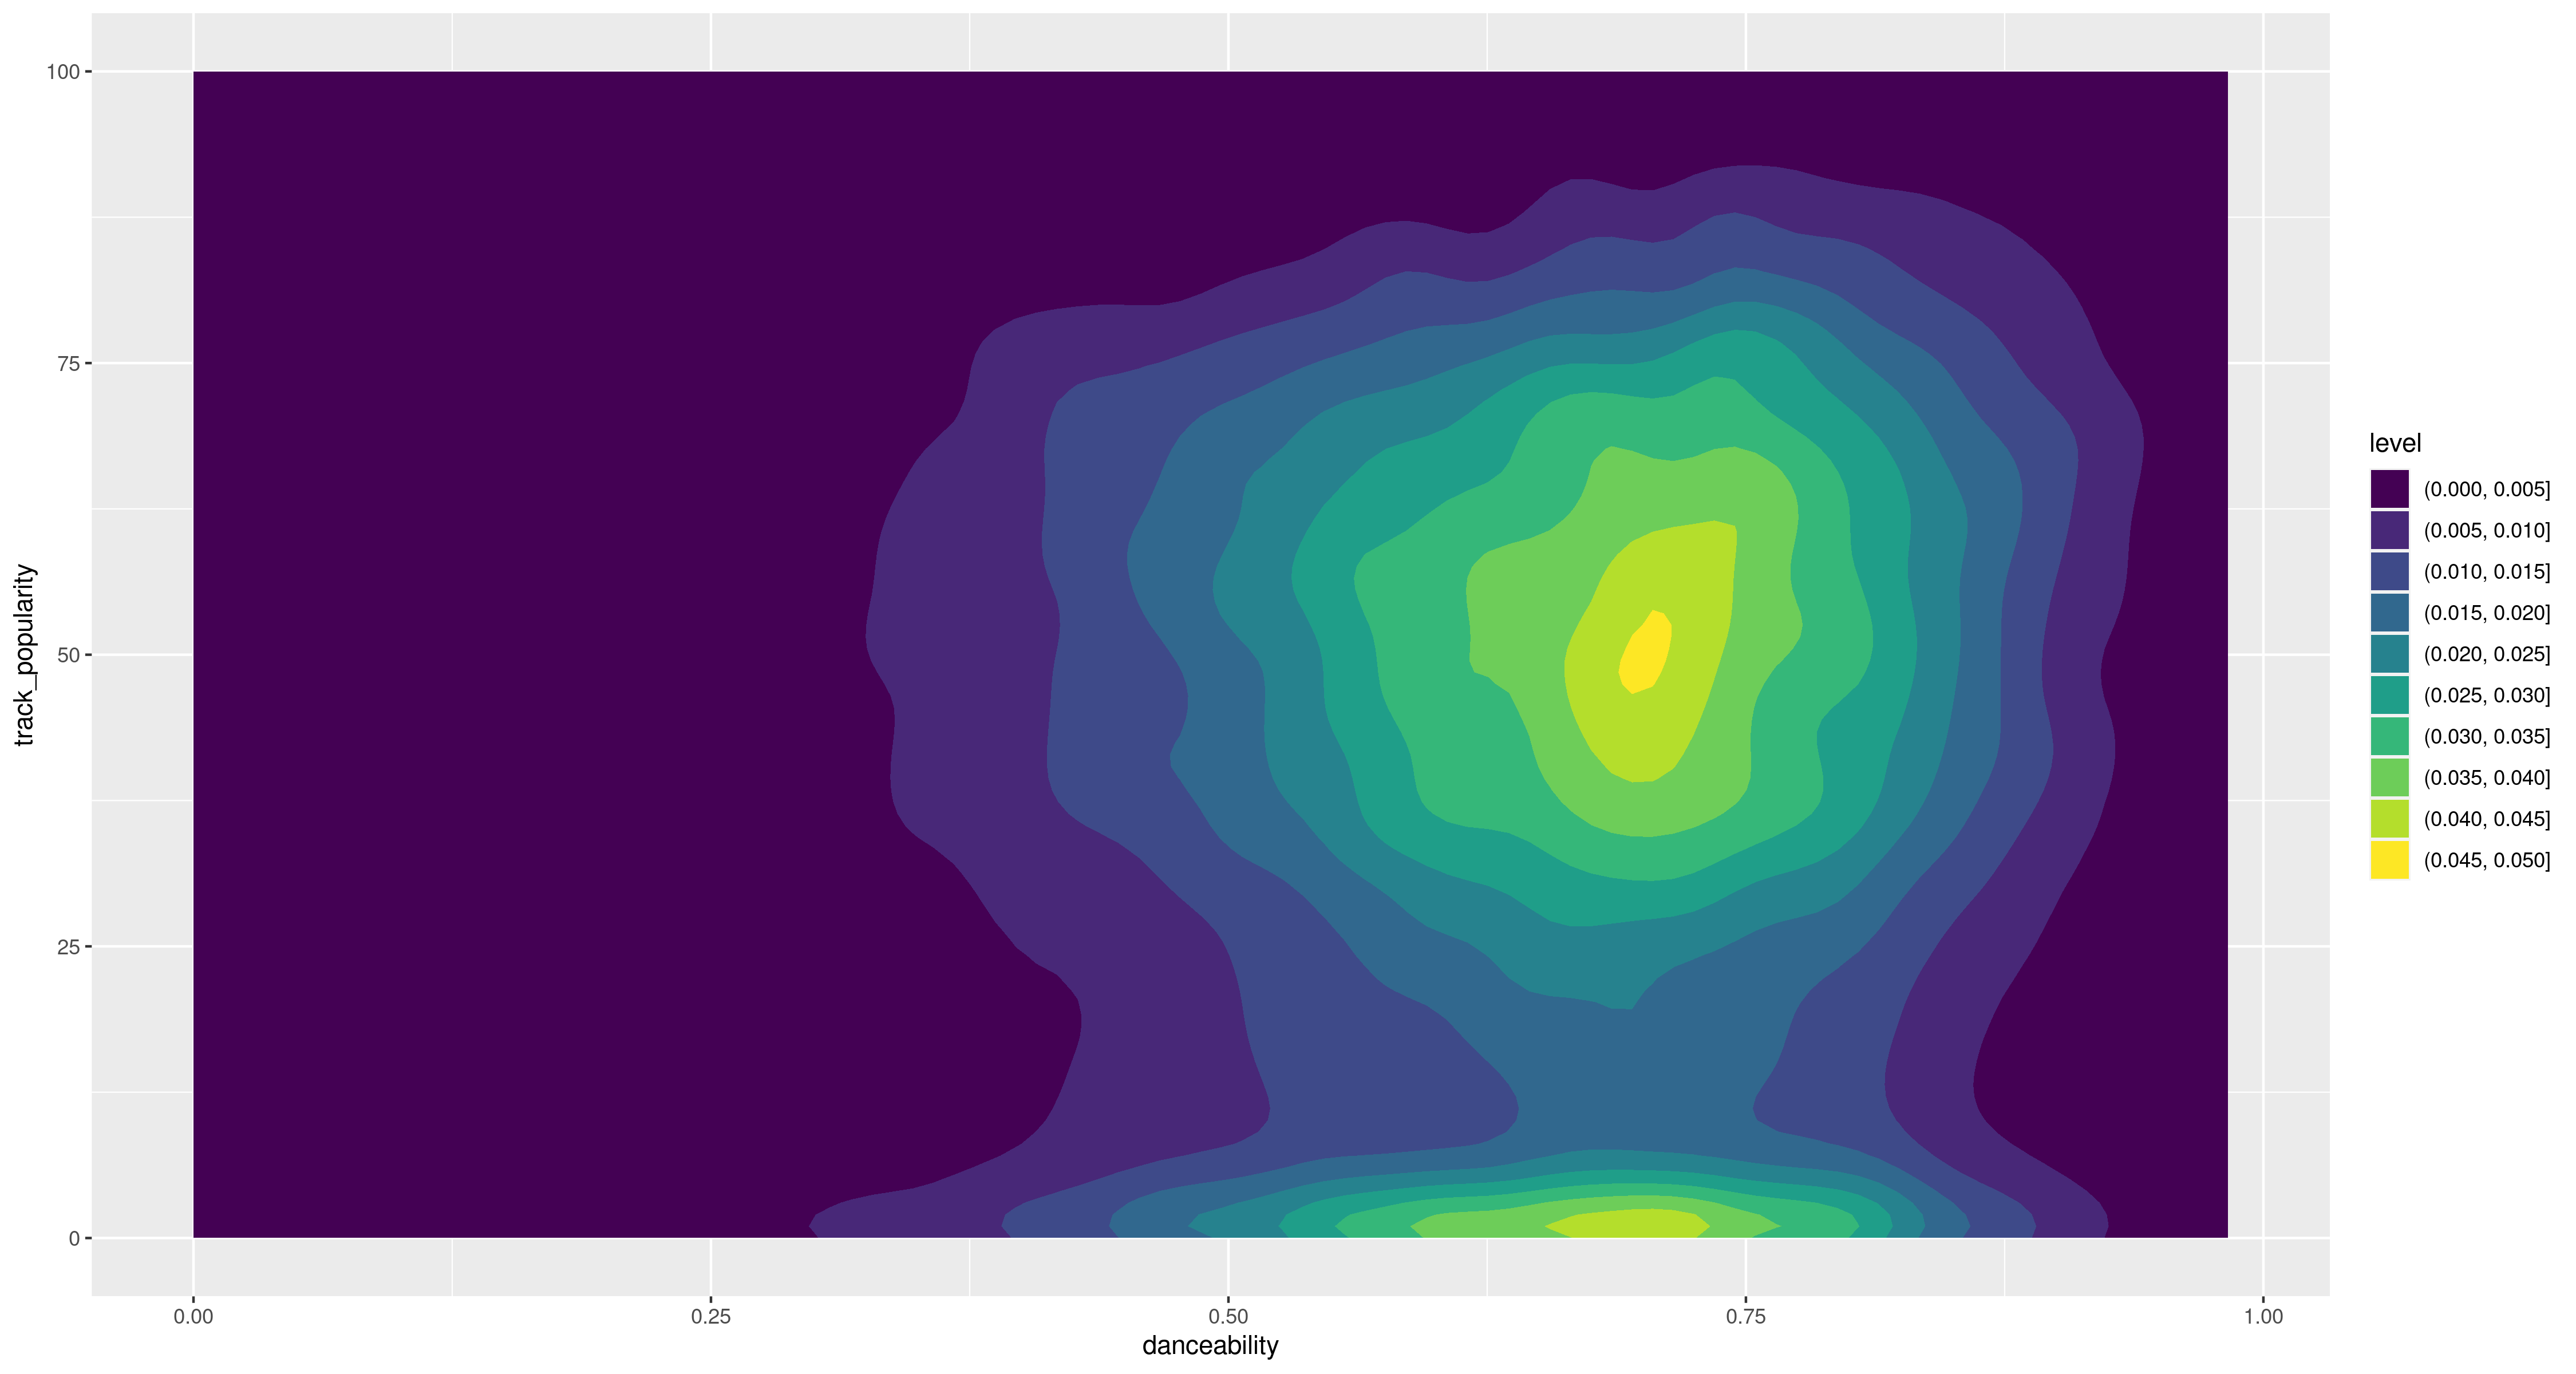

In [5]:
ggplot(spotify_df) + geom_density_2d_filled(aes(y=track_popularity, x=danceability))


Call:
lm(formula = track_popularity ~ danceability, data = spotify_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.024 -18.415   2.934  19.480  57.105 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   35.1757     0.6361   55.30   <2e-16 ***
danceability  11.1497     0.9484   11.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.93 on 32831 degrees of freedom
Multiple R-squared:  0.004192,	Adjusted R-squared:  0.004162 
F-statistic: 138.2 on 1 and 32831 DF,  p-value: < 2.2e-16



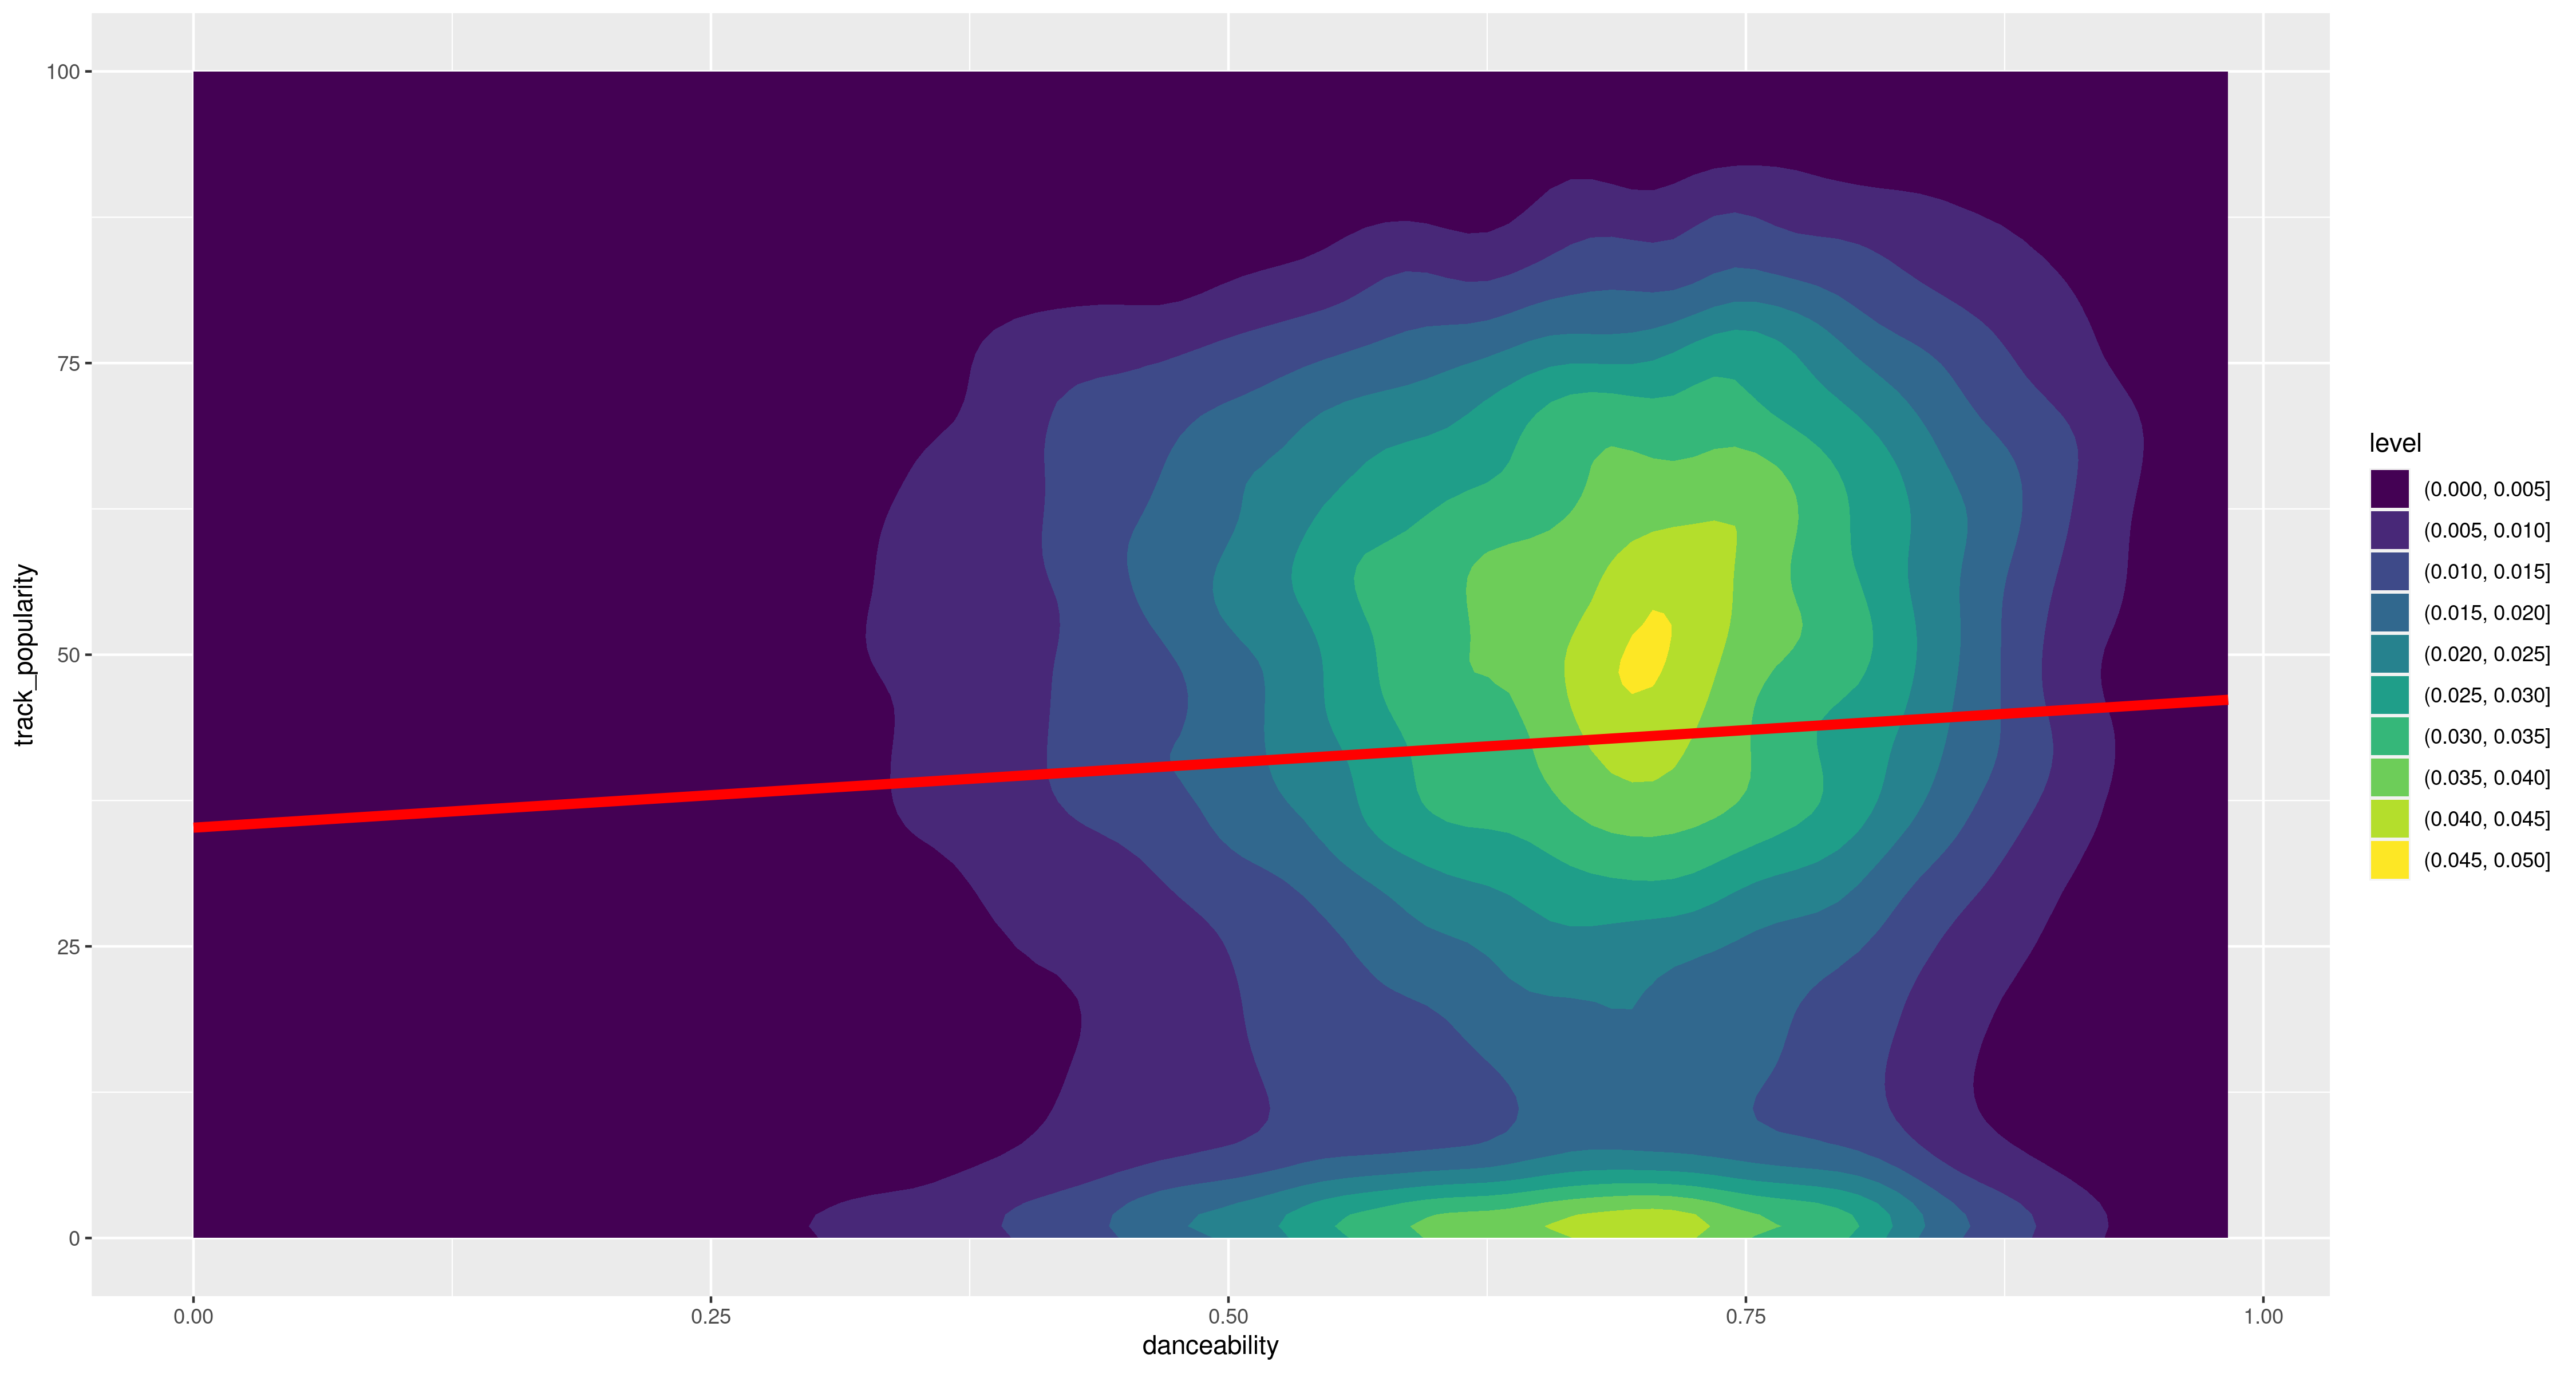

In [6]:
reg_small <- lm(track_popularity ~ danceability, spotify_df)
print(summary(reg_small))

ggplot(spotify_df) +
    geom_density_2d_filled(aes(y=track_popularity, x=danceability)) +
    geom_line(aes(x=danceability, y=reg_small$fitted.values), color="red", linewidth=2)
  

In [7]:
regressors <- paste(vars, collapse=" + ")
reg_form <- formula(paste0("track_popularity ~ 1 + ", regressors))
reg <- lm(reg_form, spotify_df)
summary(reg)


Call:
lm(formula = reg_form, data = spotify_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.192 -17.623   3.164  19.028  73.049 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       70.72506    1.41460  49.996  < 2e-16 ***
danceability       7.25947    0.95764   7.581 3.53e-14 ***
energy           -28.97272    1.15325 -25.123  < 2e-16 ***
key                0.01268    0.03705   0.342 0.732089    
loudness           1.66635    0.06295  26.470  < 2e-16 ***
speechiness       -5.22873    1.35531  -3.858 0.000115 ***
acousticness       4.85701    0.72650   6.686 2.34e-11 ***
instrumentalness -12.82794    0.61687 -20.795  < 2e-16 ***
liveness          -4.39969    0.88736  -4.958 7.15e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.23 on 32824 degrees of freedom
Multiple R-squared:  0.05935,	Adjusted R-squared:  0.05912 
F-statistic: 258.9 on 8 and 32824 DF,  p-value: < 2.2e-16


# Bodyfat

Source:
https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset

Suitable for prediction, EDA.  

(Measurement standards are apparently those listed in Benhke and Wilmore (1974),
pp. 45-48 where, for instance, the abdomen 2 circumference is measured
"laterally, at the level of the iliac crests, and anteriorly, at the
umbilicus".)

These data are used to produce the predictive equations for lean body weight
given in the abstract "Generalized body composition prediction equation for men
using simple measurement techniques", K.W. Penrose, A.G. Nelson, A.G. Fisher,
FACSM, Human Performance Research Center, Brigham Young University, Provo, Utah
84602 as listed in Medicine and Science in Sports and Exercise, vol. 17, no. 2,
April 1985, p. 189. (The predictive equation wer

## Motivation

Measuring bodyfat precisely is hard, and proxies are very useful.  Can we predict the outcome of an expensive, inconvenient procedure using only easy-to-gather measurements?

![Hydrostatic weighing](hydrostatic-weighing-pd.jpg)

Image from https://www.topendsports.com/testing/tests/underwater.htm

In [8]:
bodyfat_df <- read.csv("datasets/bodyfat.csv")
head(bodyfat_df)
nrow(bodyfat_df)

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,1.0502,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


[1] 252

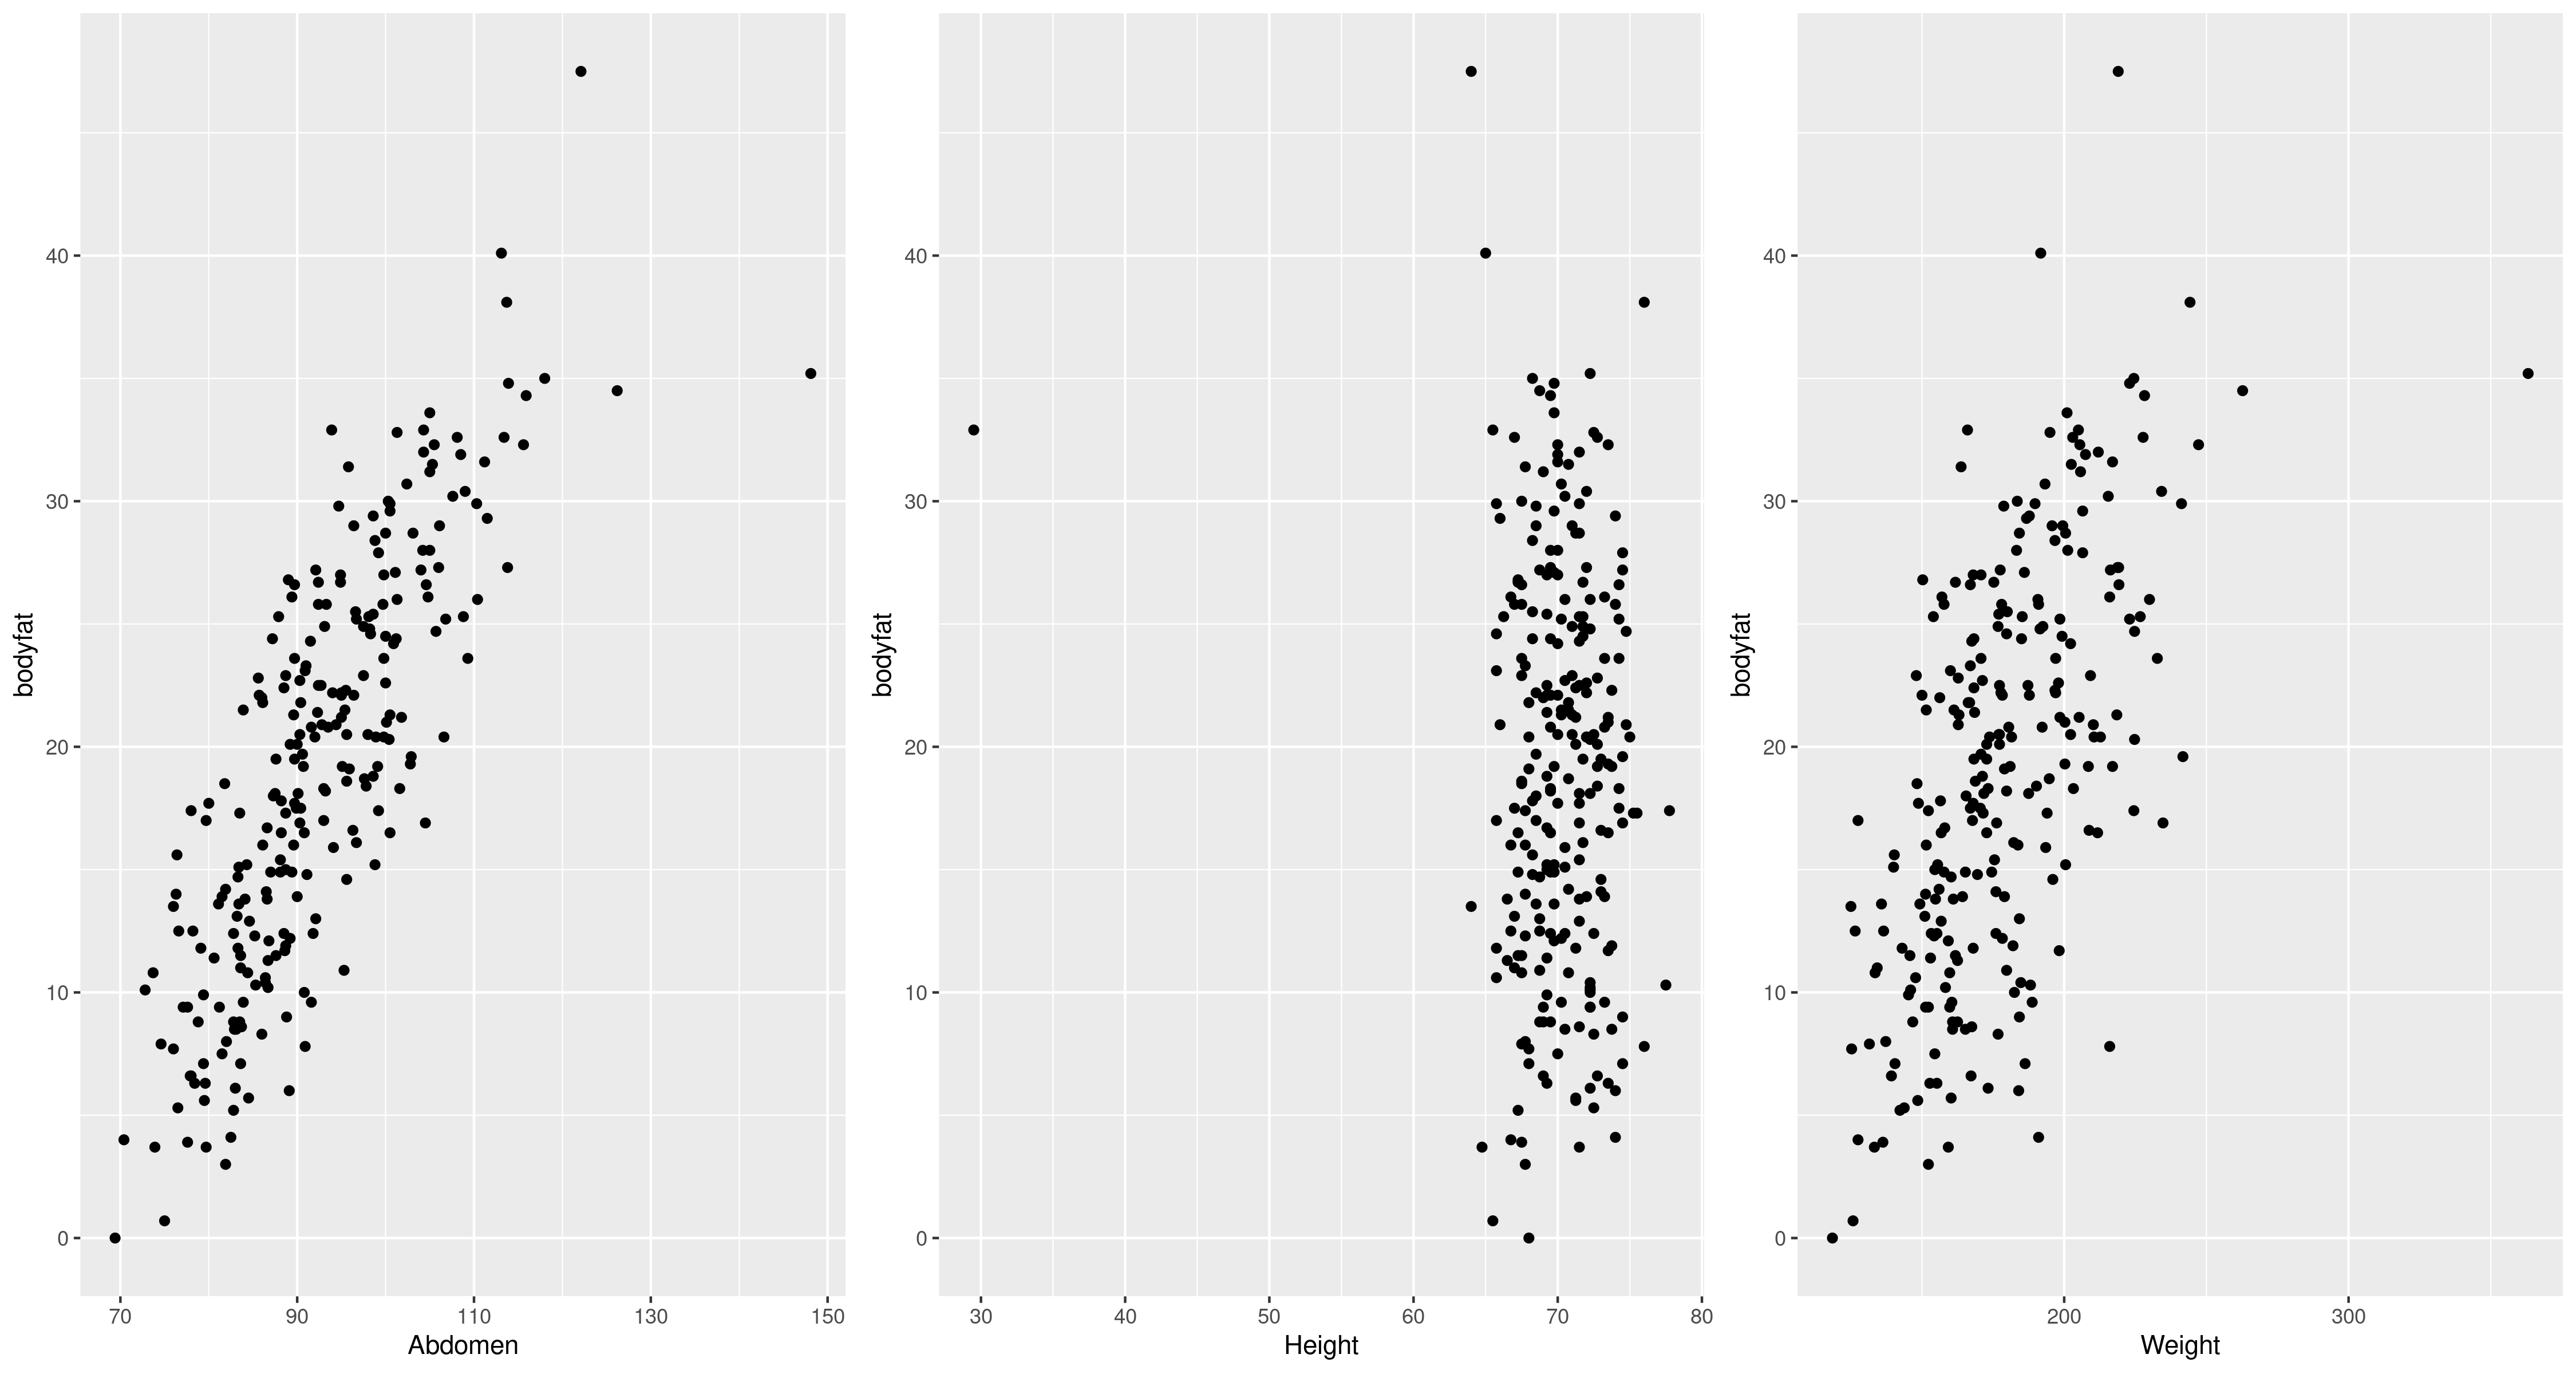

In [9]:
vars <- c("Weight", "Height", "Neck", "Chest", "Abdomen", "Hip", "Thigh", "Knee", "Ankle", "Biceps", "Forearm", "Wrist")
stopifnot(all(vars %in% names(bodyfat_df)))

grid.arrange(
    ggplot(bodyfat_df) + geom_point(aes(x=Abdomen, y=bodyfat)),
    ggplot(bodyfat_df) + geom_point(aes(x=Height, y=bodyfat)),
    ggplot(bodyfat_df) + geom_point(aes(x=Weight, y=bodyfat)),
    ncol=3)


Call:
lm(formula = reg_form, data = bodyfat_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4341  -3.0551  -0.0158   3.1951   9.7682 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -19.54803   17.43111  -1.121   0.2632    
Weight       -0.10974    0.05266  -2.084   0.0382 *  
Height       -0.09410    0.09569  -0.983   0.3264    
Neck         -0.42995    0.23280  -1.847   0.0660 .  
Chest        -0.01728    0.09964  -0.173   0.8625    
Abdomen       1.02953    0.07761  13.266   <2e-16 ***
Hip          -0.22995    0.14626  -1.572   0.1172    
Thigh         0.13476    0.13510   0.997   0.3195    
Knee          0.13187    0.23554   0.560   0.5761    
Ankle         0.12974    0.22150   0.586   0.5586    
Biceps        0.20538    0.17163   1.197   0.2326    
Forearm       0.38964    0.19756   1.972   0.0497 *  
Wrist        -1.27227    0.50602  -2.514   0.0126 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual

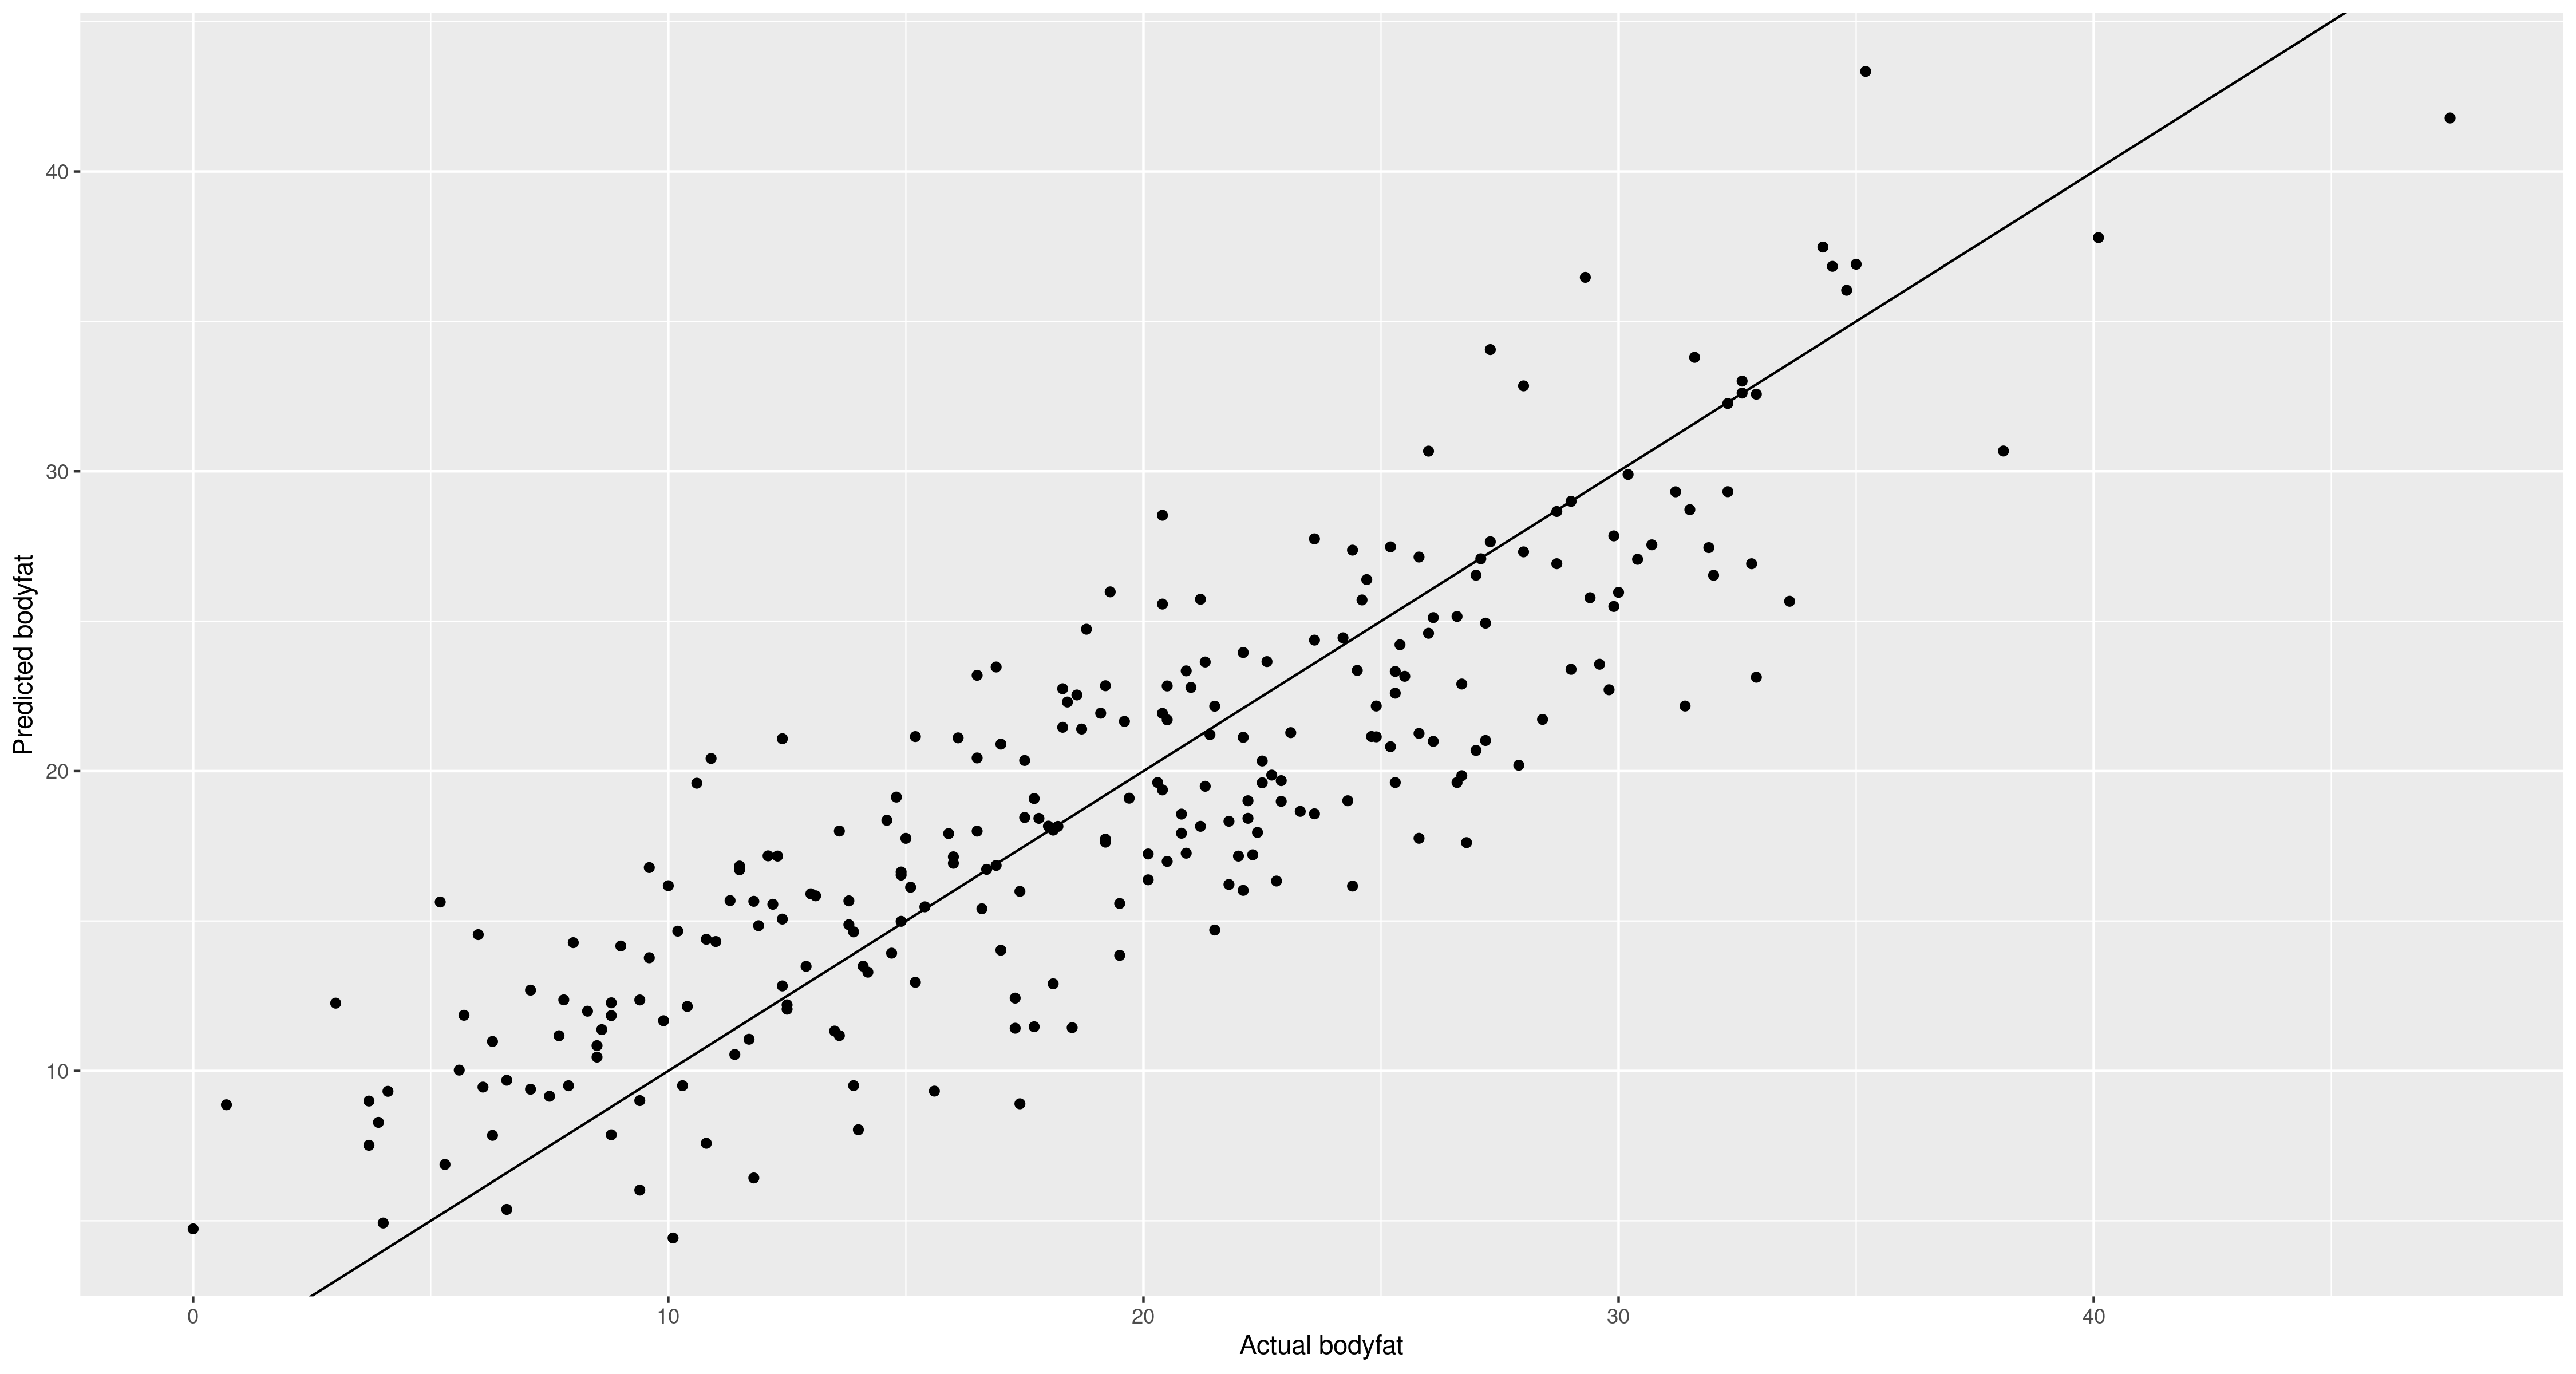

In [10]:
regressors <- paste(vars, collapse=" + ")
reg_form <- formula(paste0("bodyfat ~ 1 + ", regressors))
reg <- lm(reg_form, bodyfat_df)
summary(reg)

ggplot() +
    geom_point(aes(x=bodyfat_df$bodyfat, y=reg$fitted.values)) +
    geom_abline(aes(slope=1, intercept=0)) +
    xlab("Actual bodyfat") + ylab("Predicted bodyfat")

# Aluminum

Stress-strain plots of AL data.  For a given amount of force, how much does a bar of aluminum deform?

![Testing rig](AL_tensile_testing.png)

Taken from 
https://data.mendeley.com/datasets/rd6jm9tyb6/2

See paper and methods at
https://www.sciencedirect.com/science/article/pii/S0263823118313831?via%3Dihub



In [11]:
al_df <- read.csv(file="datasets/aluminum_dataset.csv") %>% 
  filter(loading_type == "T", temp == 20, lot == "A")
head(al_df)

,Strain,Stress_MPa,loading_type,temp,lot,specimen,filename
,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>,<chr>
1,1.746888e-05,0.1470586,T,20,A,1,T_020_A_1_001_022_03.csv
2,2.096203e-05,0.1480829,T,20,A,1,T_020_A_1_001_022_03.csv
3,1.871861e-05,0.1676320,T,20,A,1,T_020_A_1_001_022_03.csv
4,1.634951e-05,0.1929697,T,20,A,1,T_020_A_1_001_022_03.csv
5,1.951097e-05,0.2212170,T,20,A,1,T_020_A_1_001_022_03.csv
6,2.155187e-05,0.2569143,T,20,A,1,T_020_A_1_001_022_03.csv


In [12]:
print(table(al_df[c("lot", "specimen")]))

   specimen
lot   1   2   3
  A 614 645 630


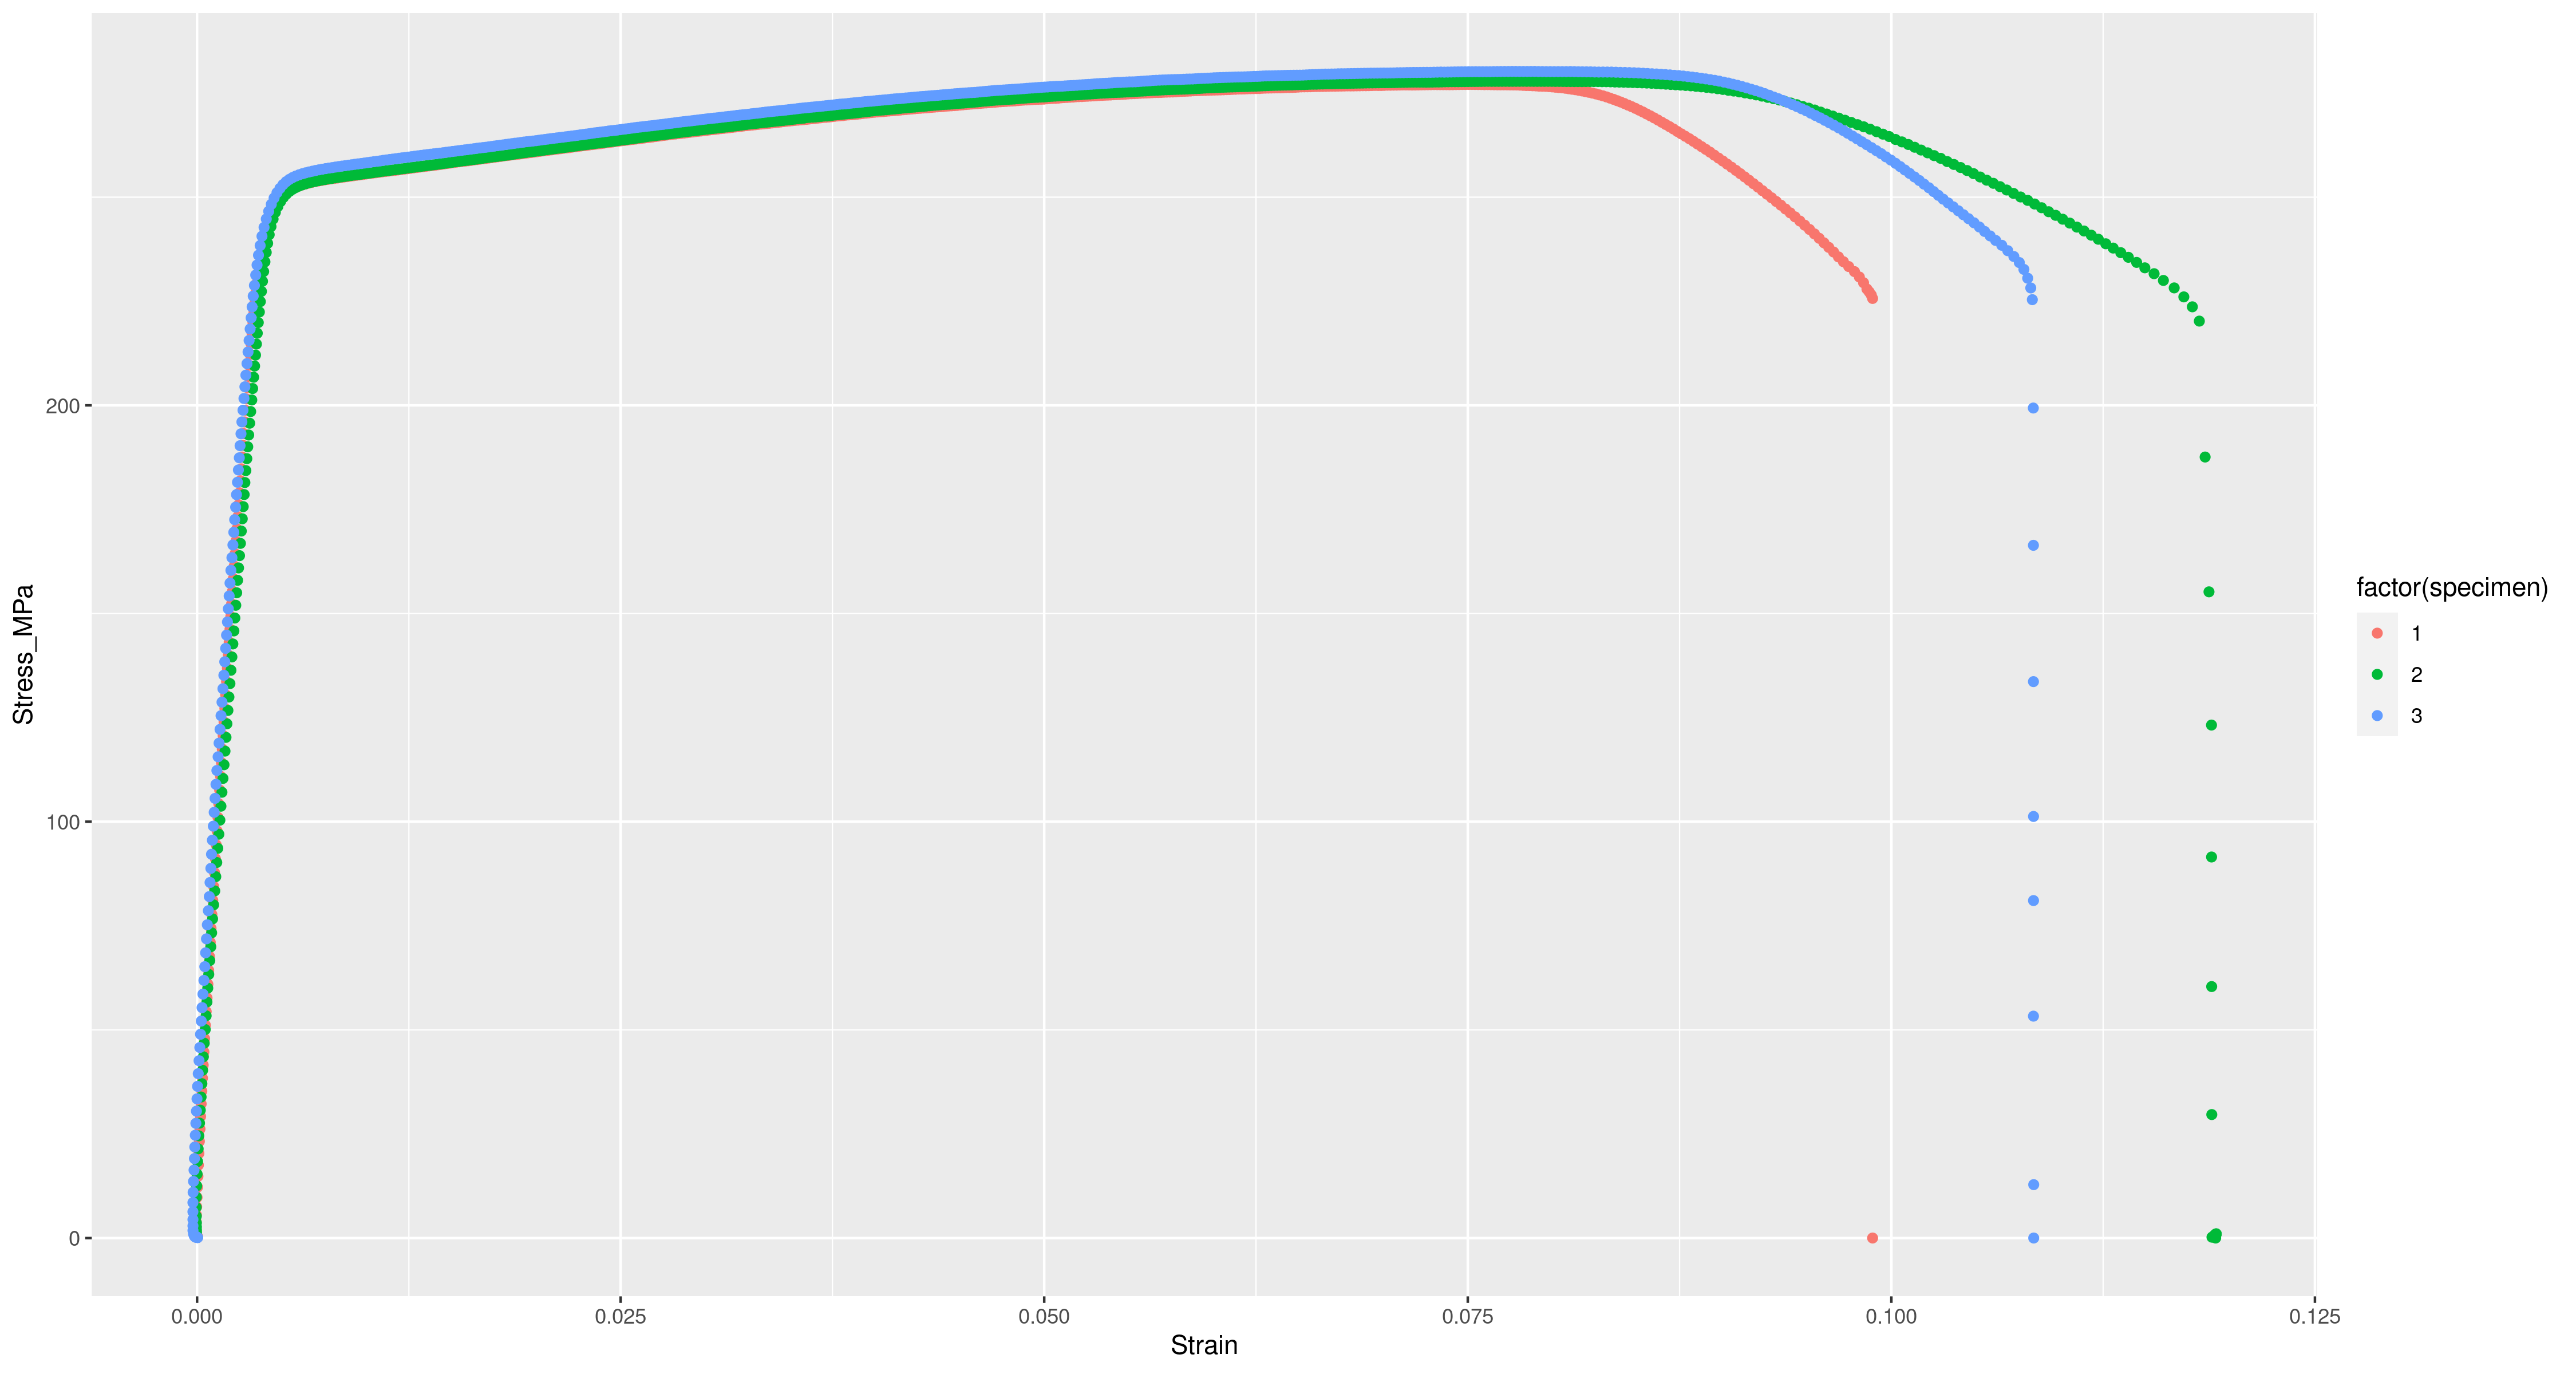

In [13]:
ggplot(al_df) +
  geom_point(aes(x=Strain, y=Stress_MPa, color=factor(specimen)))

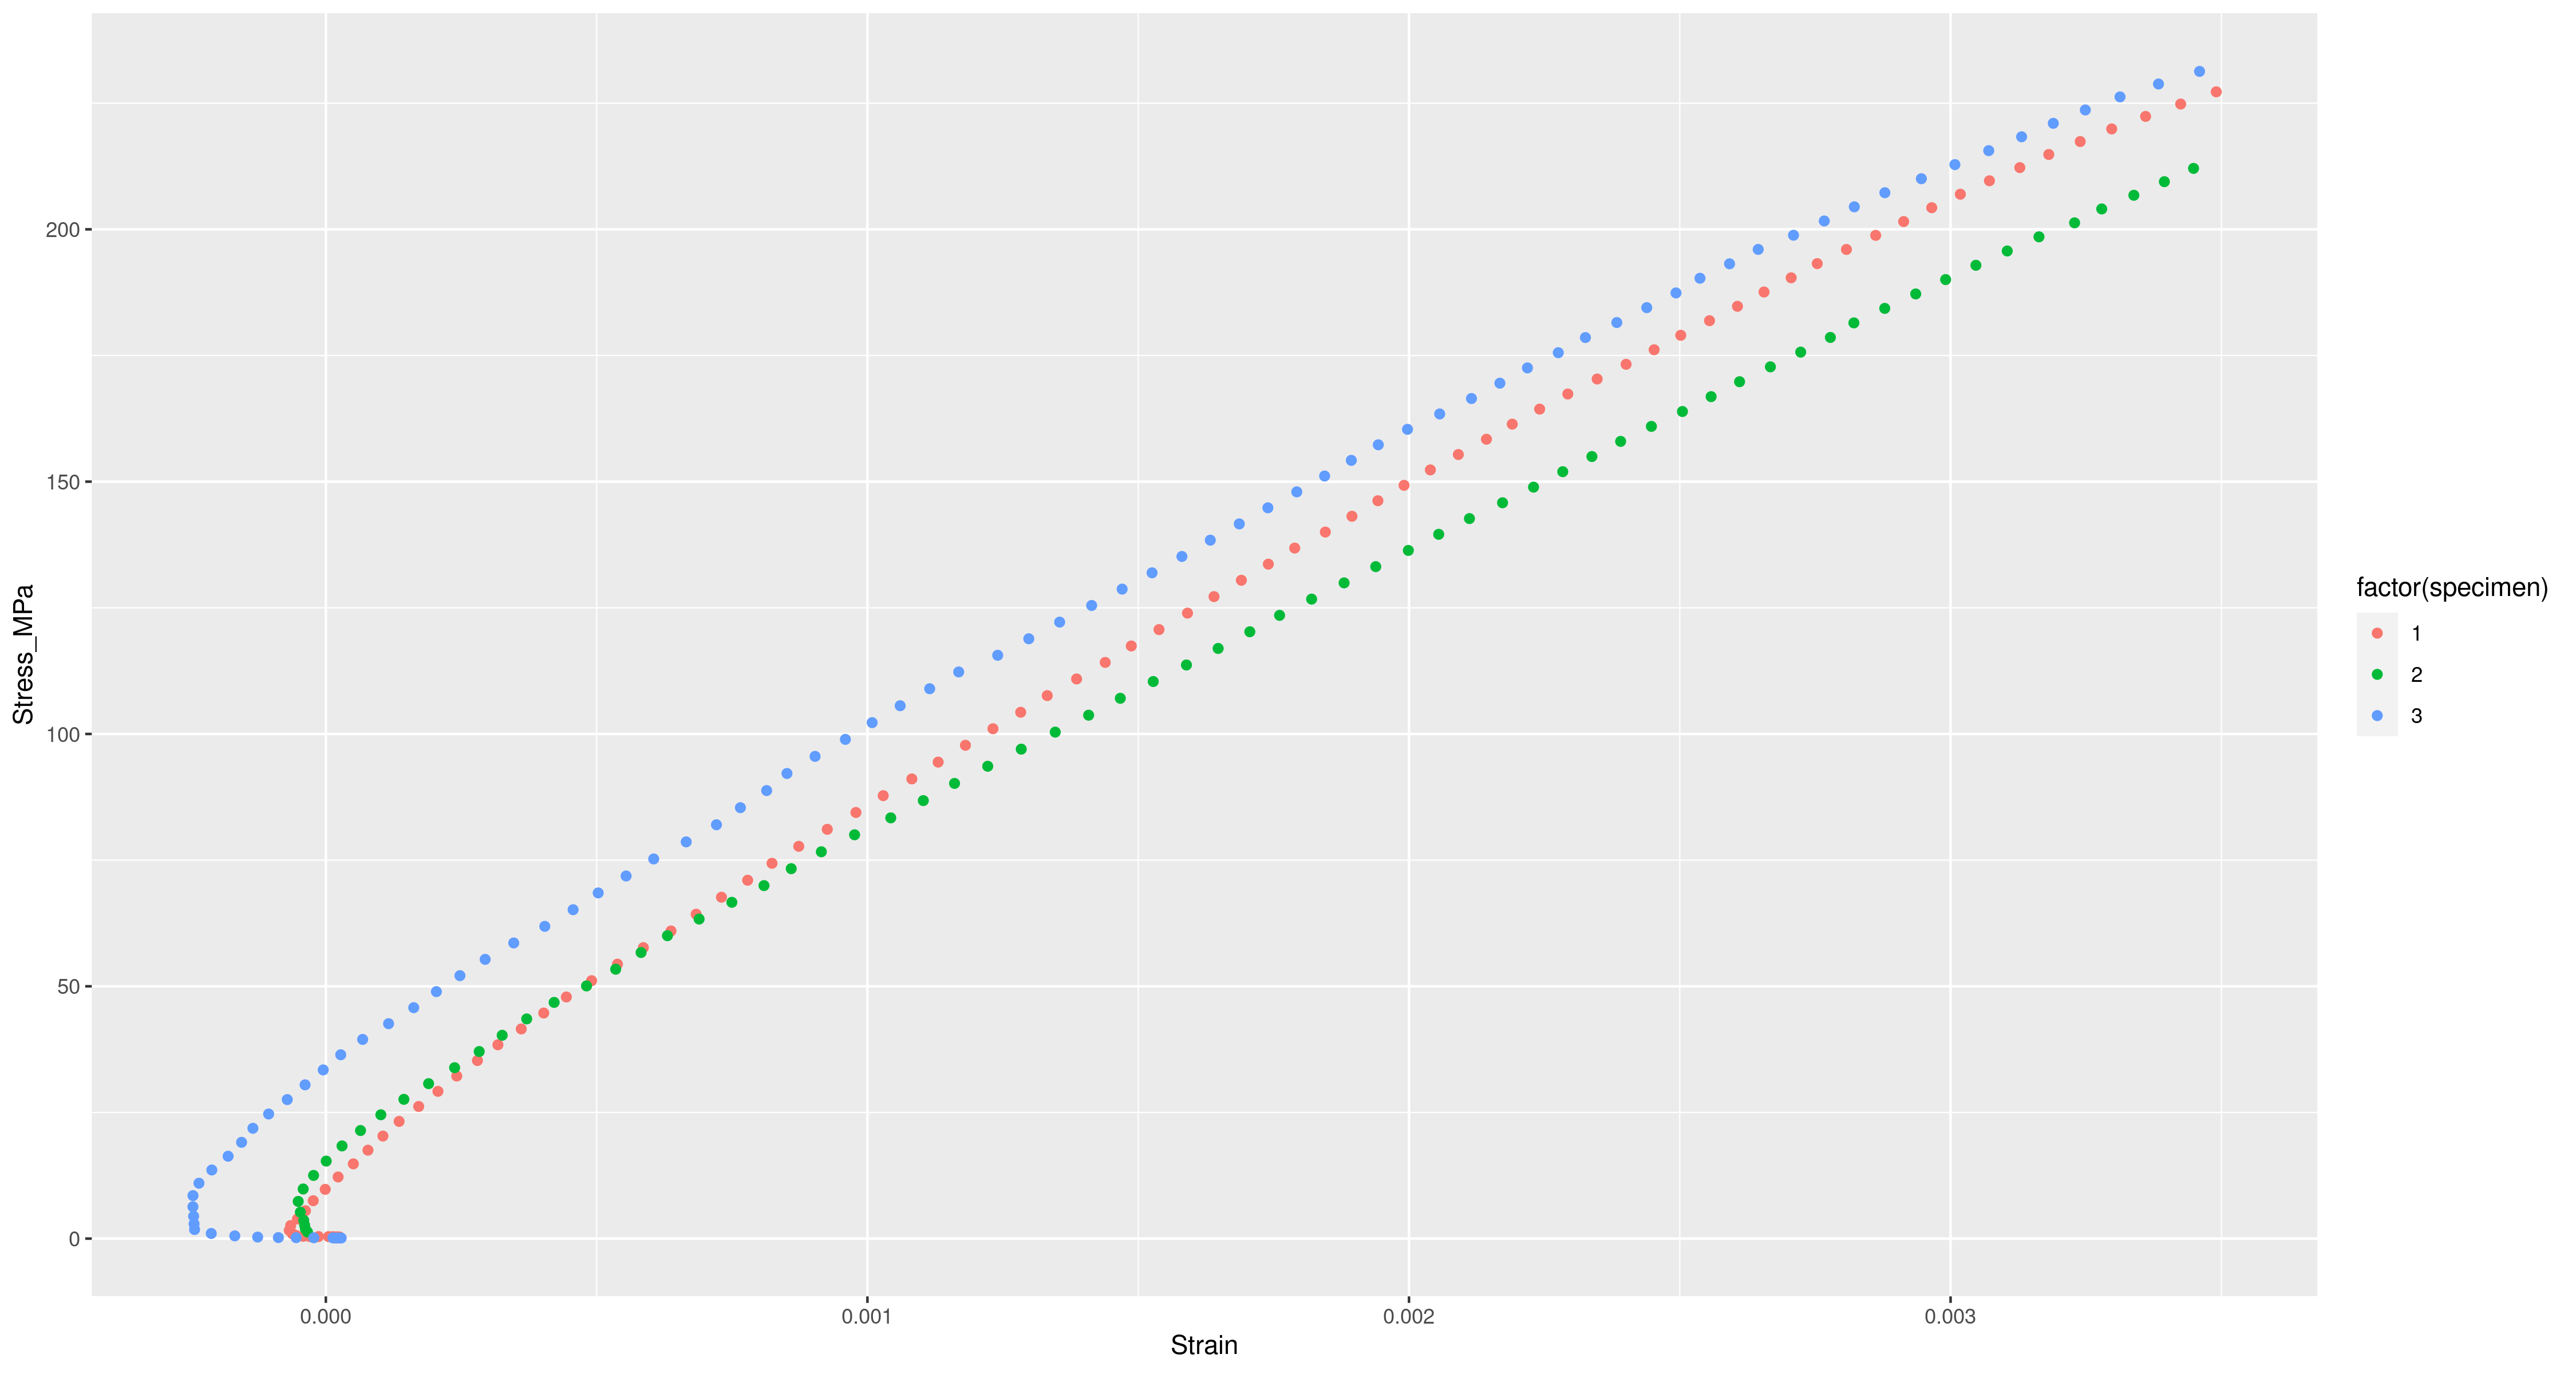

In [14]:
al_df %>% filter(Strain < 0.0035) %>%
  ggplot() +
    geom_point(aes(x=Strain, y=Stress_MPa, color=factor(specimen)))

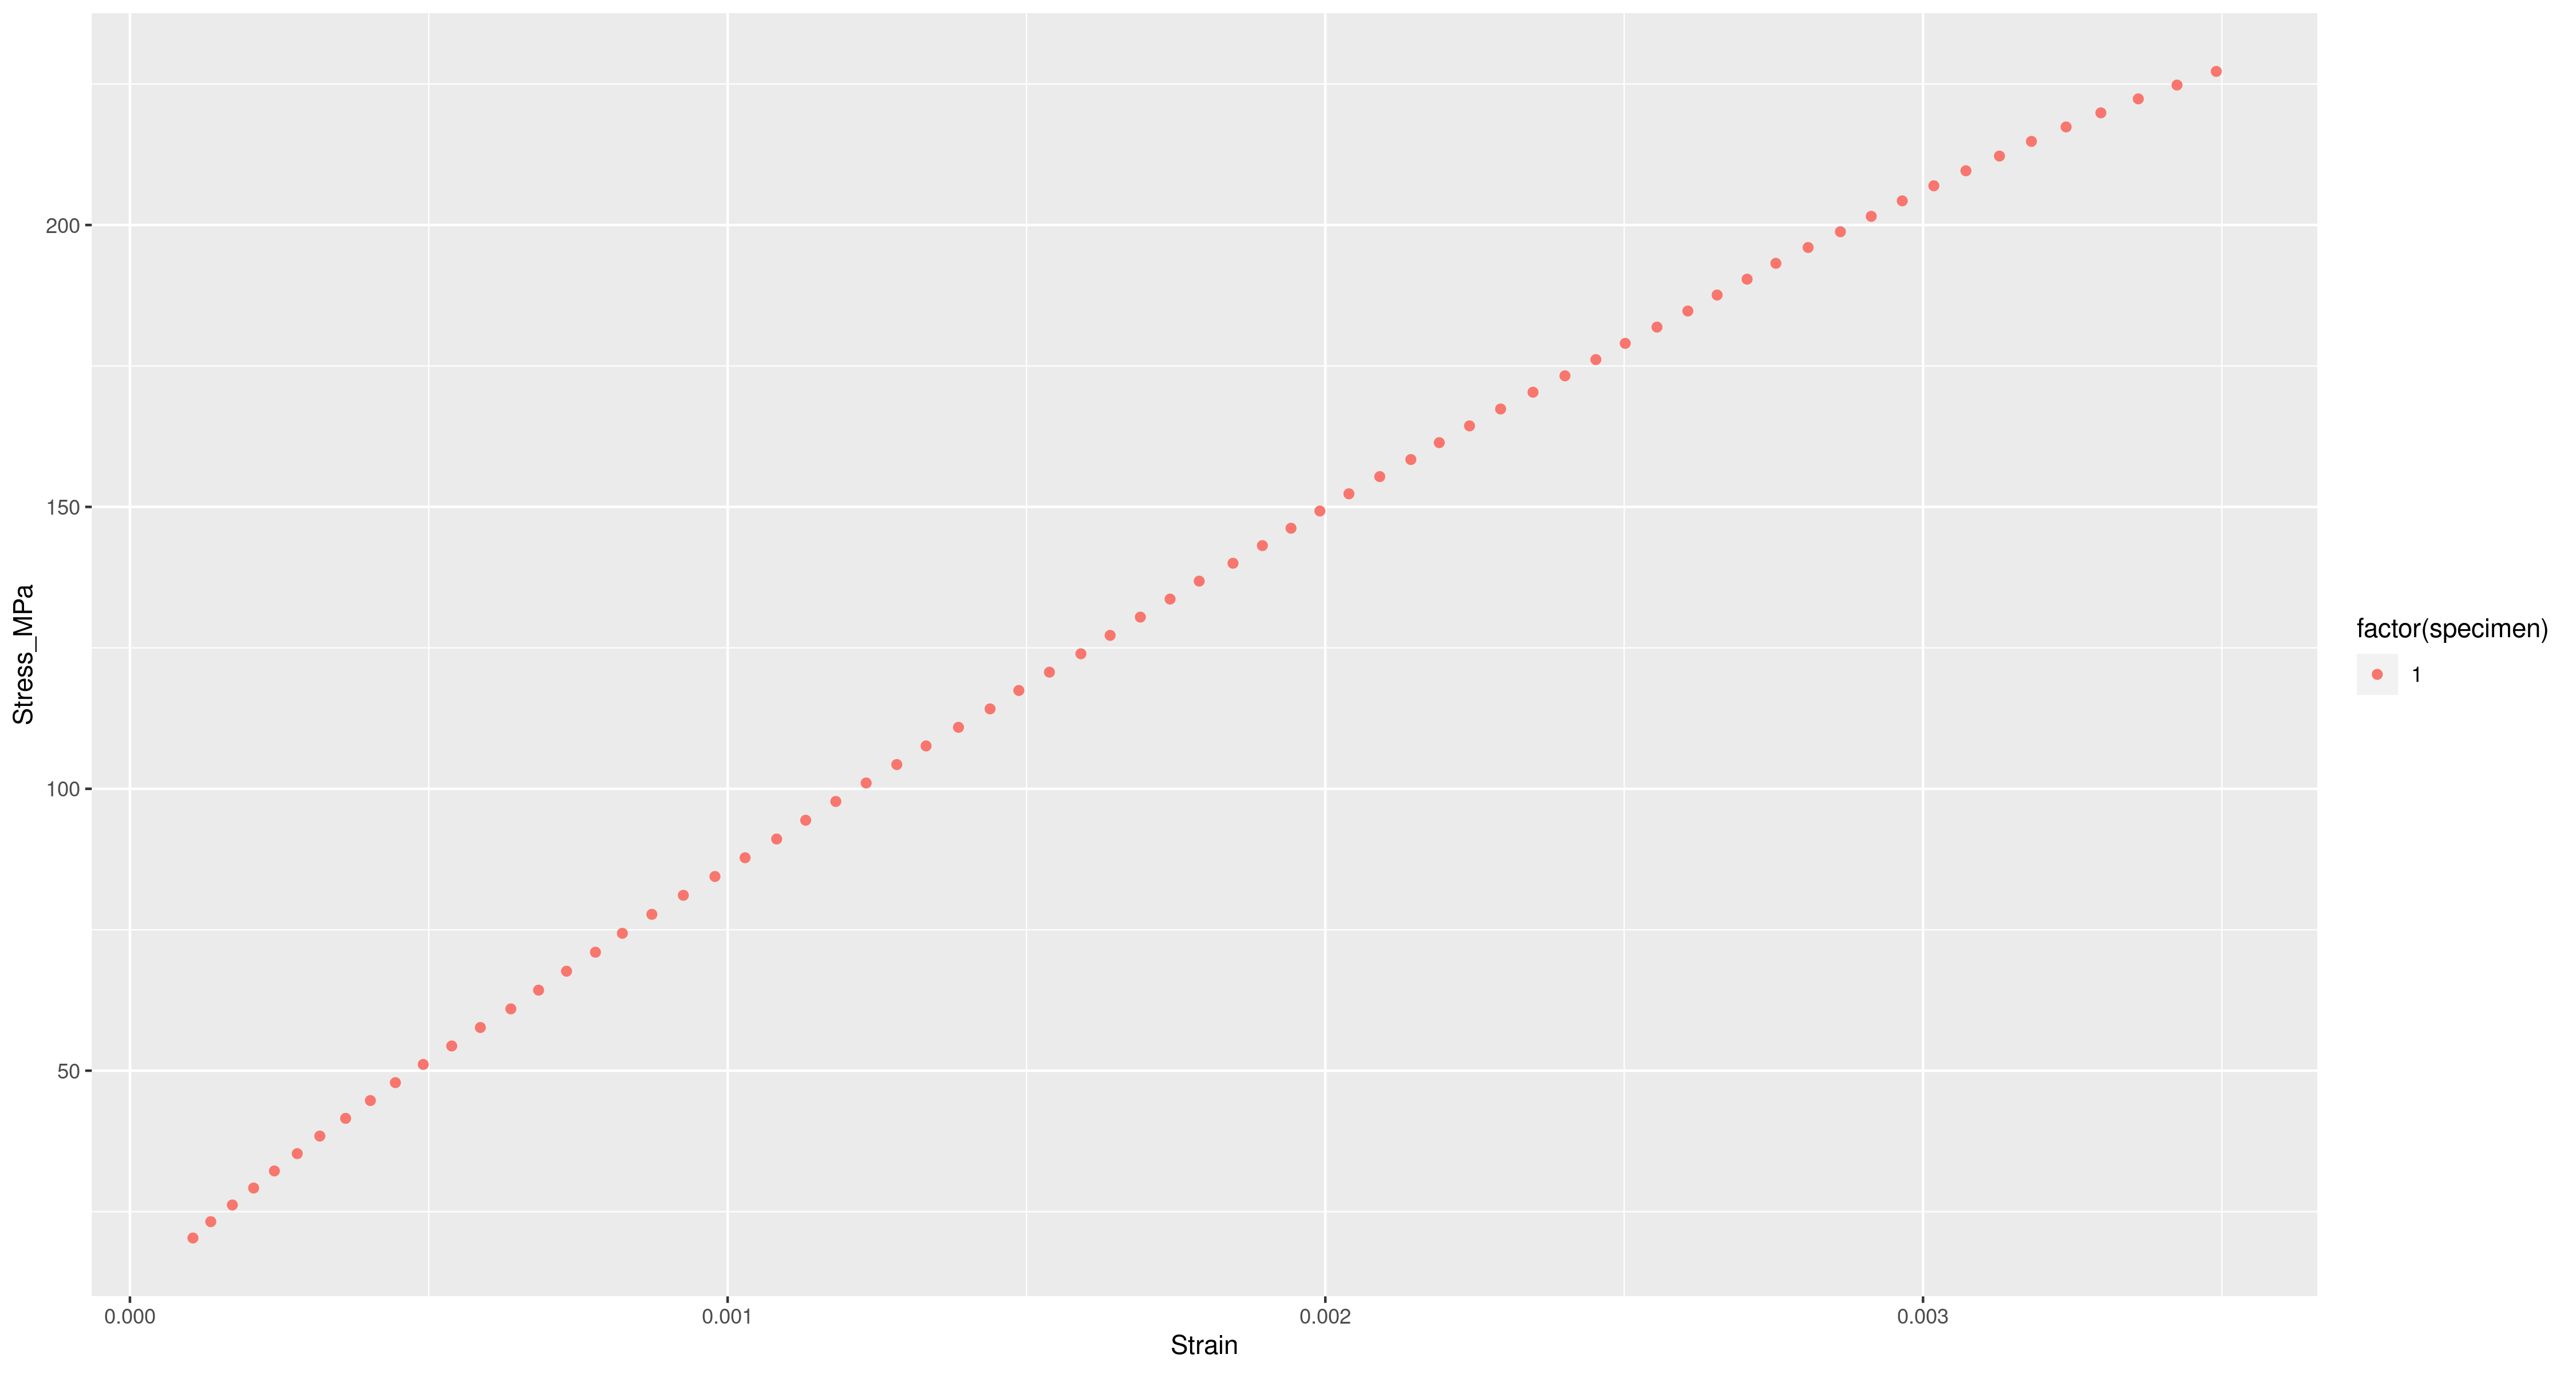

In [15]:
al_reg_df <- al_df %>% filter(Strain < 0.0035, Strain > 0.0001, specimen == 1)
ggplot(al_reg_df) +
  geom_point(aes(x=Strain, y=Stress_MPa, color=factor(specimen)))

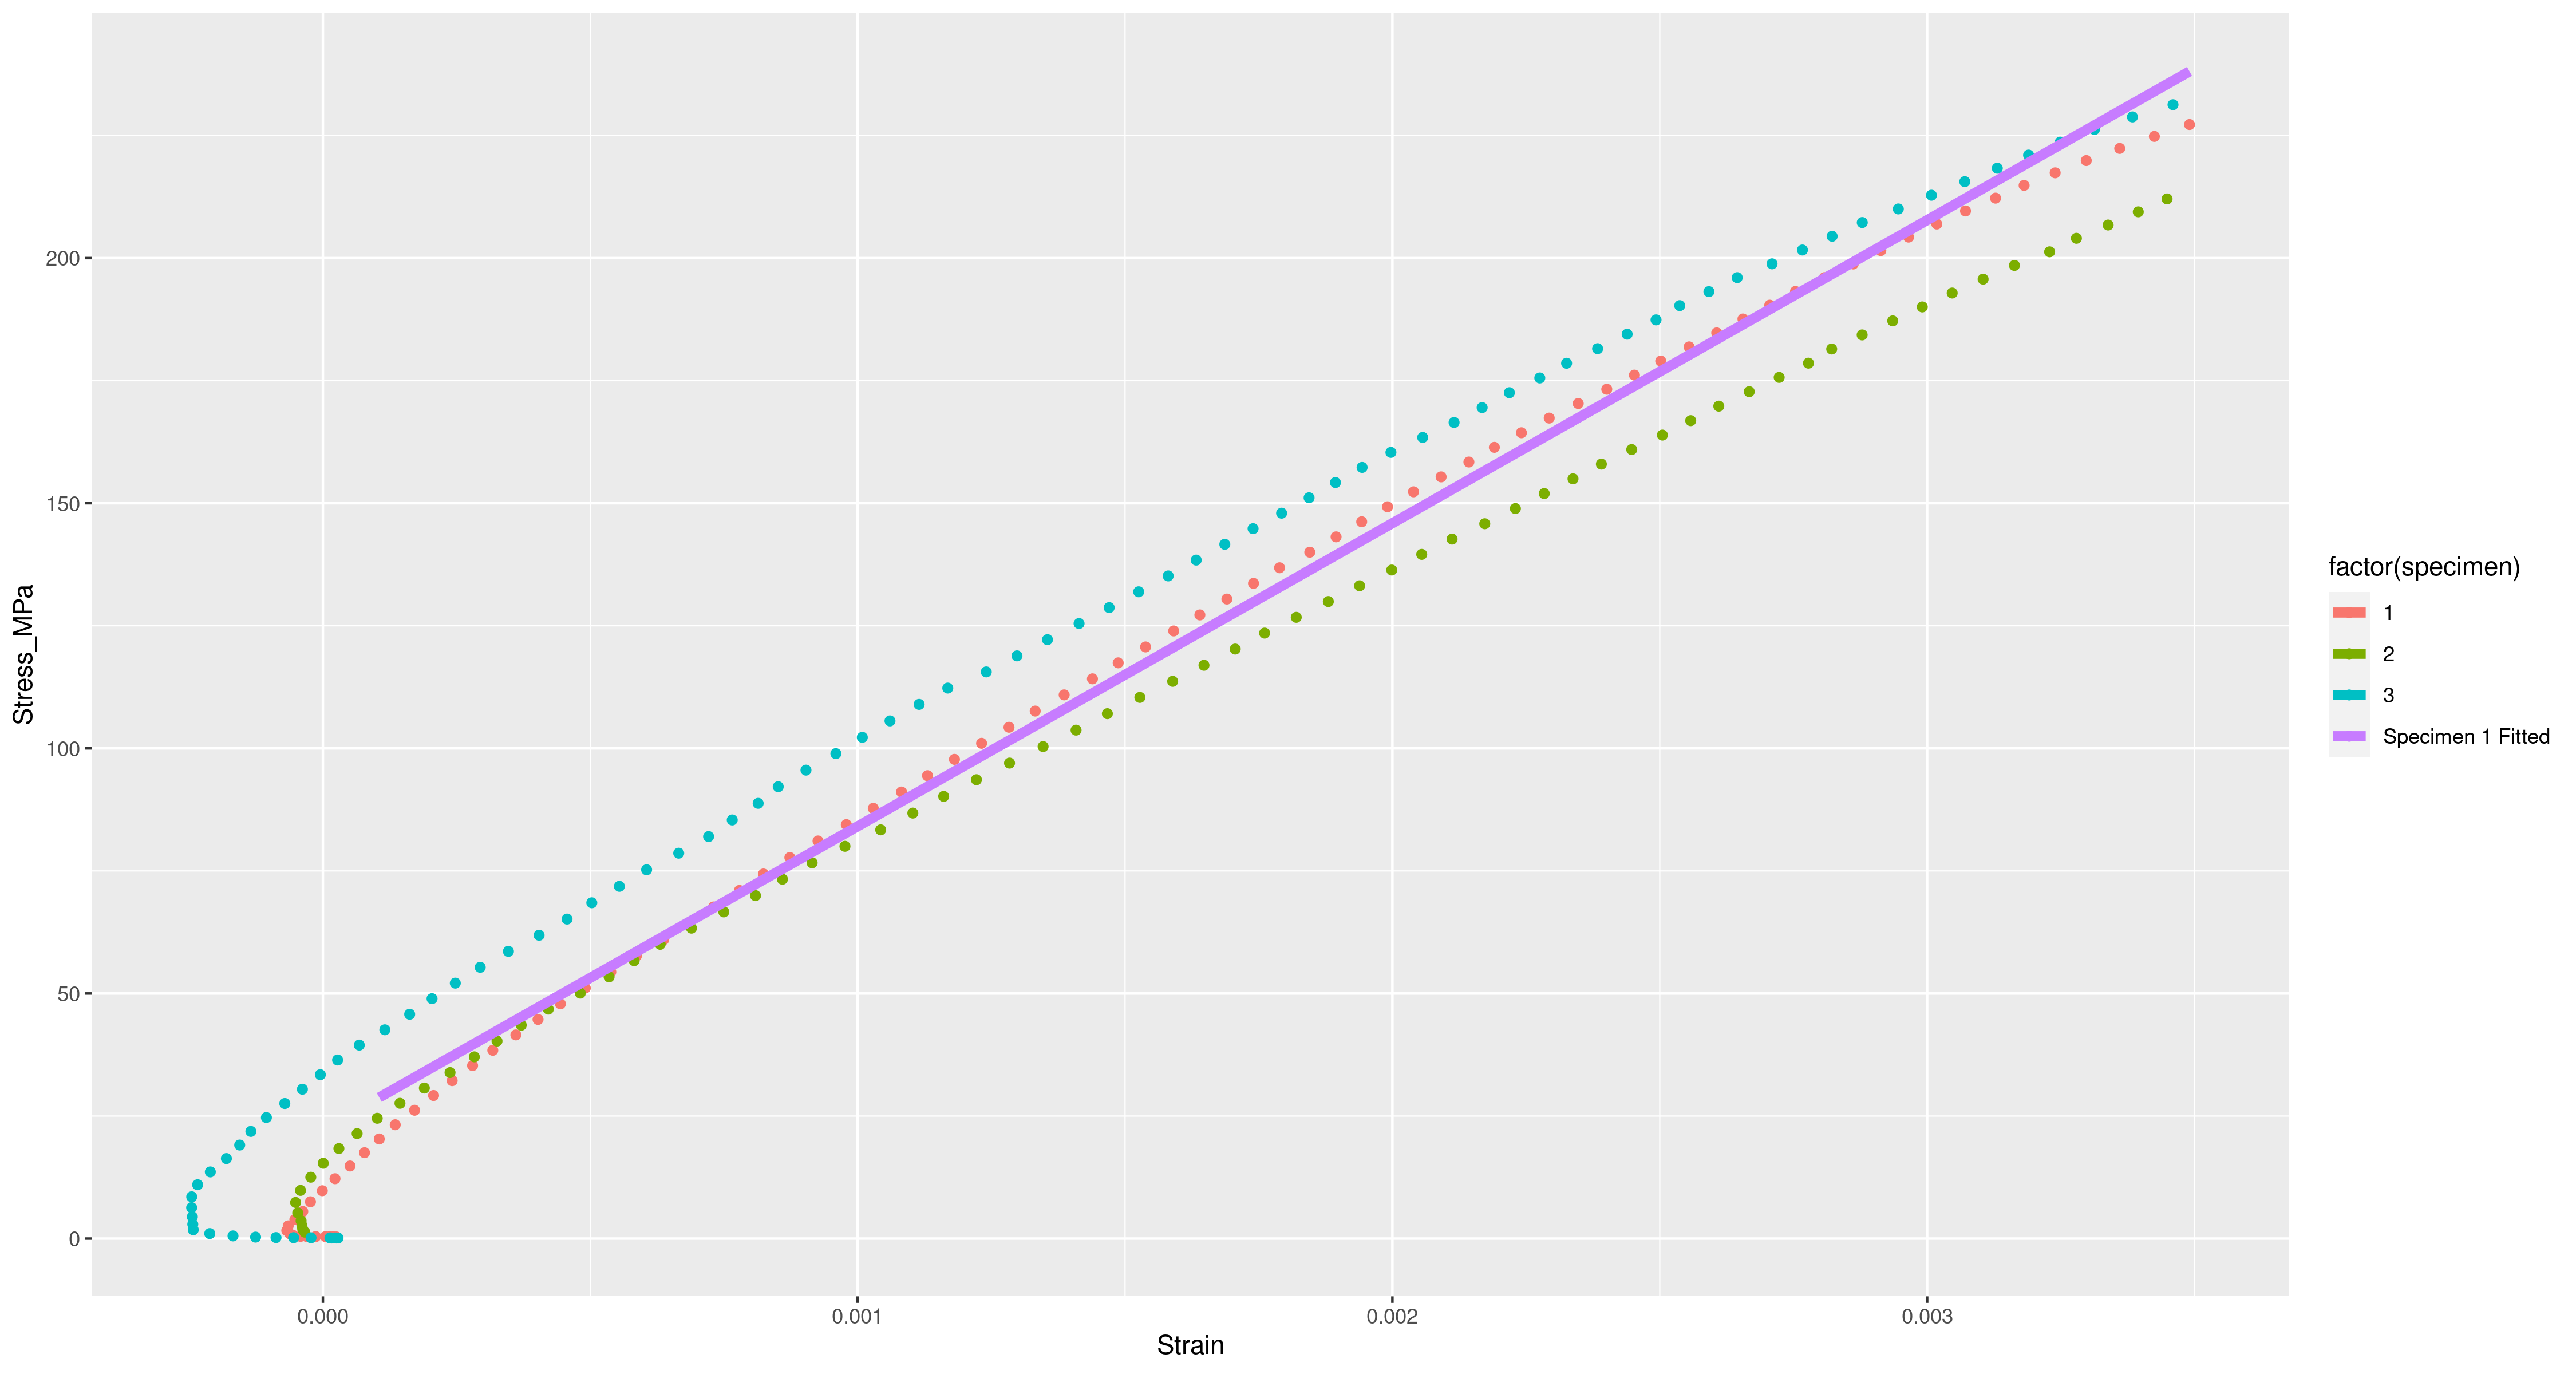

In [16]:
reg <- lm(Stress_MPa ~ 1 + Strain, al_reg_df)
al_reg_df$fit <- reg$fitted.values
al_df %>% filter(Strain < 0.0035) %>%
  ggplot() +
    geom_point(aes(x=Strain, y=Stress_MPa, color=factor(specimen))) +
    geom_line(aes(x=Strain, y=fit, color="Specimen 1 Fitted"), lwd=2, data=al_reg_df)